In [1]:
import pandas as pd
import os
import numpy as np
import numpy.ma as ma
import glob
from netCDF4 import Dataset,date2num,num2date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import xlsxwriter
import sklearn.metrics as metrics
from scipy.stats import spearmanr

In [2]:
Case='General_mm.xlsx'
df_1=pd.read_excel('E:/data/evaluation_QPE_test2/'+Case,sheet_name='R_Z_ZDR_KDP')
df_2=pd.read_excel('E:/data/evaluation_QPE_test2/'+Case,sheet_name='R_Z_ZDR')

In [3]:
def evaluation_scores(y,yhat):
    tr=(yhat-y)
    me=round(tr.sum()/tr.count(),2)
    mae = round(metrics.mean_absolute_error(y, yhat),2)
    mse = round(metrics.mean_squared_error(y, yhat),2)
    rmse = round(np.sqrt(mse),2) # or mse**(0.5)  
    r2 =np.corrcoef(y, yhat)[1]
    return me,mae,mse,rmse,r2

In [4]:
print(Case[:-5])
print("-----------")
me1,mae1,mse1,rmse1,r1=evaluation_scores(df_1.R_10p,df_1.R_Z_ZDR_KDP)
print("Results of R_Z_ZDR_KDP:")
print("ME:",me1,"MAE:",mae1,"MSE:",mse1,"RMSE:",rmse1,"R-Squared:",r1)
me2,mae2,mse2,rmse2,r2=evaluation_scores(df_2.R_10p,df_2.R_Z_ZDR)
print("Results of R_Z_ZDR:")
print("ME:",me2,"MAE:",mae2,"MSE:",mse2,"RMSE:",rmse2,"R-Squared:",r2)
me3,mae3,mse3,rmse3,r3=evaluation_scores(df_2.R_10p,df_2.R_Z)
print("Results of R_Z:")
print("ME:",me3,"MAE:",mae3,"MSE:",mse3,"RMSE:",rmse3,"R-Squared:",r3)
me4,mae4,mse4,rmse4,r4=evaluation_scores(df_1.R_10p,df_1.R_KDP)
print("Results of R_KDP:")
print("ME:",me4,"MAE:",mae4,"MSE:",mse4,"RMSE:",rmse4,"R-Squared:",r4)
me5,mae5,mse5,rmse5,r5=evaluation_scores(df_2.R_10p,df_2.R_Z_noSVM)
print("Results of R_Z_No_SVM:")
print("ME:",me5,"MAE:",mae5,"MSE:",mse5,"RMSE:",rmse5,"R-Squared:",r5)
me6,mae6,mse6,rmse6,r6=evaluation_scores(df_2.R_10p,df_2.R_Marshall)
print("Results of R_Z_Mashall:")
print("ME:",me6,"MAE:",mae6,"MSE:",mse6,"RMSE:",rmse6,"R-Squared:",r6)

General_mm
-----------
Results of R_Z_ZDR_KDP:
ME: -0.29 MAE: 0.54 MSE: 1.62 RMSE: 1.27 R-Squared: [0.55630792 1.        ]
Results of R_Z_ZDR:
ME: -0.29 MAE: 0.53 MSE: 1.69 RMSE: 1.3 R-Squared: [0.528733 1.      ]
Results of R_Z:
ME: -0.27 MAE: 0.55 MSE: 1.76 RMSE: 1.33 R-Squared: [0.46125123 1.        ]
Results of R_KDP:
ME: -0.29 MAE: 0.56 MSE: 1.71 RMSE: 1.31 R-Squared: [0.53105027 1.        ]
Results of R_Z_No_SVM:
ME: -0.29 MAE: 0.56 MSE: 1.9 RMSE: 1.38 R-Squared: [0.38889268 1.        ]
Results of R_Z_Mashall:
ME: -0.65 MAE: 0.67 MSE: 2.18 RMSE: 1.48 R-Squared: [0.42808549 1.        ]


# Tại các khoảng 0,50,100 

CC

In [5]:
stations=pd.read_excel(pd.ExcelFile("C:/Users/Admin/OneDrive/Desktop/gauges2.xlsx"),sheet_name='3')
stations['Ranges']=round(stations['Ranges'],2)

In [7]:
len(stations['Ranges'])

55

In [8]:
#Detection Events
df_de=pd.read_excel('C:/Users/Admin/OneDrive/Desktop/Practice SVM/Frequency/detec_event2.xlsx',sheet_name='mm')

In [10]:
cc_R_Z_ZDR_KDP=[]
cc_R_KDP=[]
cc_R_Z_ZDR=[]
cc_R_Z=[]
cc_R_Z_noSVM=[]
cc_R_Marshall=[]
for i in[*range(0,len(stations['Ranges']),1)]:
    sheet1=df_1.loc[(df_1.Ranges==stations['Ranges'][i])]
    sheet2=df_2.loc[(df_2.Ranges==stations['Ranges'][i])]
    cc_R_Z_ZDR_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP'])[0,1])
    cc_R_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_KDP'])[0,1])
    cc_R_Z_ZDR.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_ZDR'])[0,1])
    cc_R_Z.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z'])[0,1])
    cc_R_Z_noSVM.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_noSVM'])[0,1])
    cc_R_Marshall.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Marshall'])[0,1])
CC1=pd.DataFrame(data={
    'Ranges': stations['Ranges'],
    'Stations':stations['Tên Trạm'],
    'R_Z_ZDR_KDP': cc_R_Z_ZDR_KDP,
    'R_KDP': cc_R_KDP,
    'R_Z_ZDR': cc_R_Z_ZDR,
    'R_Z': cc_R_Z,
    'R_Z_noSVM': cc_R_Z_noSVM,
    'R_Marshall':cc_R_Marshall})
CC=pd.DataFrame(data={
    'Ranges': [1,1.3,1.6],
    'R_Z_ZDR_KDP': [CC1.loc[CC1['Ranges']<50.0]['R_Z_ZDR_KDP'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z_ZDR_KDP'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z_ZDR_KDP'].mean()],
    'R_KDP': [CC1.loc[CC1['Ranges']<50.0]['R_KDP'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_KDP'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_KDP'].mean()],
    'R_Z_ZDR': [CC1.loc[CC1['Ranges']<50.0]['R_Z_ZDR'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z_ZDR'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z_ZDR'].mean()],
    'R_Z': [CC1.loc[CC1['Ranges']<50.0]['R_Z'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z'].mean()],
    'R_Z_noSVM': [CC1.loc[CC1['Ranges']<50.0]['R_Z_noSVM'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z_noSVM'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z_noSVM'].mean()],
    'R_Marshall':[CC1.loc[CC1['Ranges']<50.0]['R_Marshall'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Marshall'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Marshall'].mean()]
    
})

In [11]:
DE_R_Z_ZDR_KDP=[round(len(df_de.loc[((df_de.Ranges<50)&(df_de.R_Z_ZDR_KDP>0.2))])/len(df_de.loc[df_de.Ranges<50]),4)*100,
                round(len(df_de.loc[((df_de.Ranges>50)&(df_de.Ranges<100)&(df_de.R_Z_ZDR_KDP>0.2))])/len(df_de.loc[(df_de.Ranges>50)&(df_de.Ranges<100)]),4)*100,
               round(len(df_de.loc[((df_de.Ranges>100)&(df_de.R_Z_ZDR_KDP>0.2))])/len(df_de.loc[df_de.Ranges>100]),4)*100
               ]
DE_R_KDP=[round(len(df_de.loc[((df_de.Ranges<50)&(df_de.R_KDP>0.2))])/len(df_de.loc[df_de.Ranges<50]),4)*100,
          round(len(df_de.loc[((df_de.Ranges>50)&(df_de.Ranges<100)&(df_de.R_KDP>0.2))])/len(df_de.loc[(df_de.Ranges>50)&(df_de.Ranges<100)]),4)*100,
         round(len(df_de.loc[((df_de.Ranges>100)&(df_de.R_KDP>0.2))])/len(df_de.loc[df_de.Ranges>100]),4)*100
         ]
DE_R_Z_ZDR=[round(len(df_de.loc[((df_de.Ranges<50)&(df_de.R_Z_ZDR>0.2))])/len(df_de.loc[df_de.Ranges<50]),4)*100,
            round(len(df_de.loc[((df_de.Ranges>50)&(df_de.Ranges<100)&(df_de.R_KDP>0.2))])/len(df_de.loc[(df_de.Ranges>50)&(df_de.Ranges<100)]),4)*100,
           round(len(df_de.loc[((df_de.Ranges>100)&(df_de.R_Z_ZDR>0.2))])/len(df_de.loc[df_de.Ranges>100]),4)*100
           ]
DE_R_Z=[round(len(df_de.loc[((df_de.Ranges<50)&(df_de.R_Z>0.2))])/len(df_de.loc[df_de.Ranges<50]),4)*100,
         round(len(df_de.loc[((df_de.Ranges>50)&(df_de.Ranges<100)&(df_de.R_Z>0.2))])/len(df_de.loc[(df_de.Ranges>50)&(df_de.Ranges<100)]),4)*100,
       round(len(df_de.loc[((df_de.Ranges>100)&(df_de.R_Z>0.2))])/len(df_de.loc[df_de.Ranges>100]),4)*100
       ]
DE_R_Z_noSVM=[round(len(df_de.loc[((df_de.Ranges<50)&(df_de.R_Z_noSVM>0.2))])/len(df_de.loc[df_de.Ranges<50]),4)*100,
         round(len(df_de.loc[((df_de.Ranges>50)&(df_de.Ranges<100)&(df_de.R_Z_noSVM>0.2))])/len(df_de.loc[(df_de.Ranges>50)&(df_de.Ranges<100)]),4)*100,
       round(len(df_de.loc[((df_de.Ranges>100)&(df_de.R_Z_noSVM>0.2))])/len(df_de.loc[df_de.Ranges>100]),4)*100
       ]
DE_R_Marshall=[round(len(df_de.loc[((df_de.Ranges<50)&(df_de.R_Marshall>0.2))])/len(df_de.loc[df_de.Ranges<50]),4)*100,
                round(len(df_de.loc[((df_de.Ranges>50)&(df_de.Ranges<100)&(df_de.R_Marshall>0.2))])/len(df_de.loc[(df_de.Ranges>50)&(df_de.Ranges<100)]),4)*100,
               round(len(df_de.loc[((df_de.Ranges>100)&(df_de.R_Marshall>0.2))])/len(df_de.loc[df_de.Ranges<50]),4)*100
]
DE=pd.DataFrame(data={
    'Ranges': [1,1.3,1.6],
    'R_Z_ZDR_KDP': DE_R_Z_ZDR_KDP,
    'R_KDP': DE_R_KDP,
    'R_Z_ZDR': DE_R_Z_ZDR,
    'R_Z': DE_R_Z,
    'R_Z_noSVM': DE_R_Z_noSVM,
    'R_Marshall':DE_R_Marshall})

# BOX data for DE
box_R_Z_ZDR_KDP=[]
box_R_KDP=[]
box_R_Z_ZDR=[]
box_R_Z=[]
box_R_Z_noSVM=[]
box_R_Marshall=[]
for i in stations['Ranges']:
    box_R_Z_ZDR_KDP.append(len(df_de.loc[((df_de.Ranges==i)&(df_de.R_Z_ZDR_KDP>0.2))])/len(df_de.loc[df_de.Ranges==i])*100)
    box_R_KDP.append(len(df_de.loc[((df_de.Ranges==i)&(df_de.R_KDP>0.2))])/len(df_de.loc[df_de.Ranges==i])*100)
    box_R_Z_ZDR.append(len(df_de.loc[((df_de.Ranges==i)&(df_de.R_Z_ZDR>0.2))])/len(df_de.loc[df_de.Ranges==i])*100)
    box_R_Z.append(len(df_de.loc[((df_de.Ranges==i)&(df_de.R_Z>0.2))])/len(df_de.loc[df_de.Ranges==i])*100)
    box_R_Z_noSVM.append(len(df_de.loc[((df_de.Ranges==i)&(df_de.R_Z_noSVM>0.2))])/len(df_de.loc[df_de.Ranges==i])*100)
    box_R_Marshall.append(len(df_de.loc[((df_de.Ranges==i)&(df_de.R_Marshall>0.2))])/len(df_de.loc[df_de.Ranges==i])*100)
BOX_DE=pd.DataFrame(data={
    'Ranges': stations['Ranges'],
    'R_Z_ZDR_KDP': box_R_Z_ZDR_KDP,
    'R_KDP': box_R_KDP,
    'R_Z_ZDR': box_R_Z_ZDR,
    'R_Z': box_R_Z,
    'R_Z_noSVM': box_R_Z_noSVM,
    'R_Marshall':box_R_Marshall})

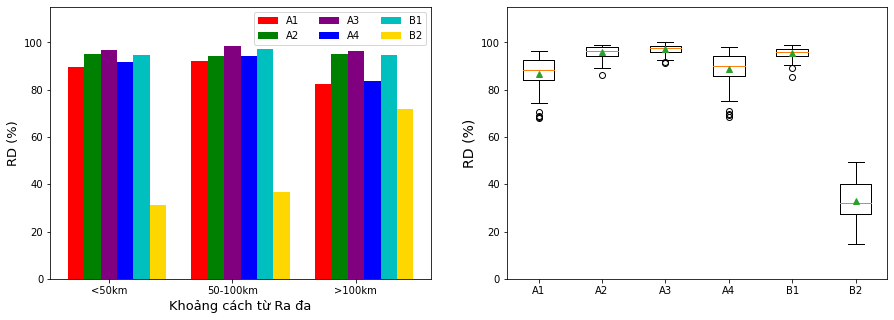

In [16]:
#bar_plot
plt.figure(figsize=(15,5))
plt.subplot(121)
bar_width = 0.04
plt.bar(DE['Ranges'],DE["R_Z_ZDR_KDP"],color='red',width=bar_width,label="A1")#, linewidth=2,color='red', label="CC_Z_ZDR_KDP",marker='o',markersize = 8)
plt.bar(DE['Ranges']+bar_width,DE["R_Z_ZDR"],color='green',width=bar_width,label="A2") #linewidth=2,color='green', label="CC_Z_ZDR",marker='o',markersize = 8)
plt.bar(DE['Ranges']+bar_width+bar_width,DE["R_Z"],color='purple',width=bar_width,label="A3") #, linewidth=2,color='black', label="CC_Z",marker='o',markersize = 8)
plt.bar(DE['Ranges']+bar_width+bar_width+bar_width,DE["R_KDP"],color='blue',width=bar_width,label="A4")#, linewidth=2,color='blue', label="CC_KDP",marker='o',markersize = 8)
plt.bar(DE['Ranges']+bar_width+bar_width+bar_width+bar_width,DE["R_Z_noSVM"],color='c',width=bar_width,label="B1")
plt.bar(DE['Ranges']+bar_width+bar_width+bar_width+bar_width+bar_width,DE["R_Marshall"],color='gold',width=bar_width,label="B2")
plt.xlabel('Khoảng cách từ Ra đa', fontsize = 13)
plt.ylabel('RD (%)', fontsize = 13)
plt.ylim(0.0,115.0)
plt.grid(False)
plt.legend(loc='upper right',ncol=3)
plt.xticks(DE['Ranges']+bar_width+bar_width,['<50km', '50-100km', '>100km']);
#box plot
plt.subplot(122)
data = [BOX_DE['R_Z_ZDR_KDP'],BOX_DE['R_Z_ZDR'],BOX_DE['R_Z'],BOX_DE['R_KDP'],BOX_DE['R_Z_noSVM'],BOX_DE['R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4","B1","B2"])
plt.ylim([0,115])
plt.ylabel('RD (%)', fontsize=14);

CC

In [17]:
cc_R_Z_ZDR_KDP=[]
cc_R_KDP=[]
cc_R_Z_ZDR=[]
cc_R_Z=[]
cc_R_Z_noSVM=[]
cc_R_Marshall=[]
for i in[*range(0,len(stations['Ranges']),1)]:
    sheet1=df_1.loc[(df_1.Ranges==stations['Ranges'][i])]
    sheet2=df_2.loc[(df_2.Ranges==stations['Ranges'][i])]
    cc_R_Z_ZDR_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP'])[0,1])
    cc_R_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_KDP'])[0,1])
    cc_R_Z_ZDR.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_ZDR'])[0,1])
    cc_R_Z.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z'])[0,1])
    cc_R_Z_noSVM.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_noSVM'])[0,1])
    cc_R_Marshall.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Marshall'])[0,1])
CC1=pd.DataFrame(data={
    'Ranges': stations['Ranges'],
    'Stations':stations['Tên Trạm'],
    'R_Z_ZDR_KDP': cc_R_Z_ZDR_KDP,
    'R_KDP': cc_R_KDP,
    'R_Z_ZDR': cc_R_Z_ZDR,
    'R_Z': cc_R_Z,
    'R_Z_noSVM': cc_R_Z_noSVM,
    'R_Marshall':cc_R_Marshall})
CC=pd.DataFrame(data={
    'Ranges': [1,1.3,1.6],
    'R_Z_ZDR_KDP': [CC1.loc[CC1['Ranges']<50.0]['R_Z_ZDR_KDP'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z_ZDR_KDP'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z_ZDR_KDP'].mean()],
    'R_KDP': [CC1.loc[CC1['Ranges']<50.0]['R_KDP'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_KDP'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_KDP'].mean()],
    'R_Z_ZDR': [CC1.loc[CC1['Ranges']<50.0]['R_Z_ZDR'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z_ZDR'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z_ZDR'].mean()],
    'R_Z': [CC1.loc[CC1['Ranges']<50.0]['R_Z'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z'].mean()],
    'R_Z_noSVM': [CC1.loc[CC1['Ranges']<50.0]['R_Z_noSVM'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Z_noSVM'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Z_noSVM'].mean()],
    'R_Marshall':[CC1.loc[CC1['Ranges']<50.0]['R_Marshall'].mean(),CC1.loc[(CC1['Ranges']>50.0) & (CC1['Ranges']<100.0)]['R_Marshall'].mean(),CC1.loc[CC1['Ranges']>100.0]['R_Marshall'].mean()]
    
})
CC

,Ranges,R_Z_ZDR_KDP,R_KDP,R_Z_ZDR,R_Z,R_Z_noSVM,R_Marshall
0,1.0,0.629408,0.587637,0.578182,0.514473,0.446789,0.500136
1,1.3,0.547547,0.504801,0.520649,0.438408,0.393260,0.434584
2,1.6,0.535455,0.503533,0.509780,0.468262,0.390458,0.443624


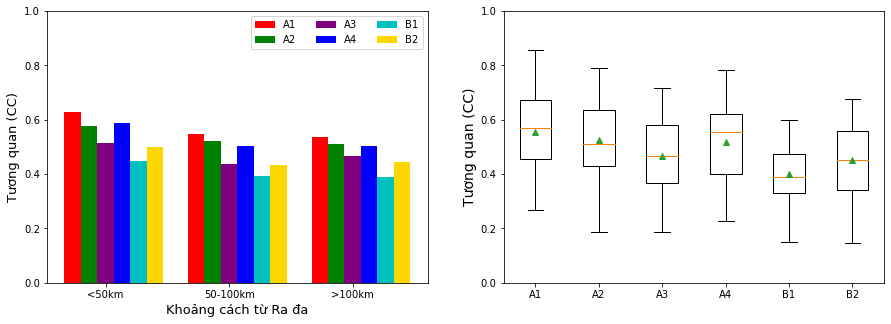

In [18]:
#bar_plot
plt.figure(figsize=(15,5))
plt.subplot(121)
bar_width = 0.04
plt.bar(CC['Ranges'],CC["R_Z_ZDR_KDP"],color='red',width=bar_width,label="A1")#, linewidth=2,color='red', label="CC_Z_ZDR_KDP",marker='o',markersize = 8)
plt.bar(CC['Ranges']+bar_width,CC["R_Z_ZDR"],color='green',width=bar_width,label="A2") #linewidth=2,color='green', label="CC_Z_ZDR",marker='o',markersize = 8)
plt.bar(CC['Ranges']+bar_width+bar_width,CC["R_Z"],color='purple',width=bar_width,label="A3") #, linewidth=2,color='black', label="CC_Z",marker='o',markersize = 8)
plt.bar(CC['Ranges']+bar_width+bar_width+bar_width,CC["R_KDP"],color='blue',width=bar_width,label="A4")#, linewidth=2,color='blue', label="CC_KDP",marker='o',markersize = 8)
plt.bar(CC['Ranges']+bar_width+bar_width+bar_width+bar_width,CC["R_Z_noSVM"],color='c',width=bar_width,label="B1")
plt.bar(CC['Ranges']+bar_width+bar_width+bar_width+bar_width+bar_width,CC["R_Marshall"],color='gold',width=bar_width,label="B2")
plt.xlabel('Khoảng cách từ Ra đa', fontsize = 13)
plt.ylabel('Tương quan (CC)', fontsize = 13)
plt.ylim(0.0,1.0)
plt.grid(False)
plt.legend(loc='upper right',ncol=3)
plt.xticks(CC['Ranges']+bar_width+bar_width,['<50km', '50-100km', '>100km']);
#box plot
plt.subplot(122)
data = [CC1['R_Z_ZDR_KDP'],CC1['R_Z_ZDR'],CC1['R_Z'],CC1['R_KDP'],CC1['R_Z_noSVM'],CC1['R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4","B1","B2"])
plt.ylim([0,1])
plt.ylabel('Tương quan (CC)', fontsize=14);

RMSE

In [19]:
#RMSE tại khoảng cách

In [20]:
RMSE_R_Z_ZDR_KDP=[]
RMSE_R_KDP=[]
RMSE_R_Z_ZDR=[]
RMSE_R_Z=[]
RMSE_R_Z_noSVM=[]
RMSE_R_Marshall=[]
for i in[*range(0,len(stations['Ranges']),1)]:
    sheet1=df_1.loc[(df_1.Ranges==stations['Ranges'][i])]
    sheet2=df_2.loc[(df_2.Ranges==stations['Ranges'][i])]
    RMSE_R_Z_ZDR_KDP.append(round(np.sqrt(metrics.mean_squared_error(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP'])),2))
    RMSE_R_KDP.append(round(np.sqrt(metrics.mean_squared_error(sheet1['R_10p'],sheet1['R_KDP'])),2))
    RMSE_R_Z_ZDR.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z_ZDR'])),2))
    RMSE_R_Z.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z'])),2))
    RMSE_R_Z_noSVM.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z_noSVM'])),2))
    RMSE_R_Marshall.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Marshall'])),2))
RMSE1=pd.DataFrame(data={
    'Ranges': stations['Ranges'],
    'Stations':stations['Tên Trạm'],
    'RMSE_R_Z_ZDR_KDP': RMSE_R_Z_ZDR_KDP,
    'RMSE_R_KDP': RMSE_R_KDP,
    'RMSE_R_Z_ZDR': RMSE_R_Z_ZDR,
    'RMSE_R_Z': RMSE_R_Z,
    'RMSE_R_Z_noSVM': RMSE_R_Z_noSVM,
    'RMSE_R_Marshall':RMSE_R_Marshall})
RMSE=pd.DataFrame(data={
    'Ranges': [1,1.3,1.6],
    'R_Z_ZDR_KDP': [RMSE1.loc[RMSE1['Ranges']<50.0]['RMSE_R_Z_ZDR_KDP'].mean(),RMSE1.loc[(RMSE1['Ranges']>50.0) & (RMSE1['Ranges']<100.0)]['RMSE_R_Z_ZDR_KDP'].mean(),RMSE1.loc[RMSE1['Ranges']>100.0]['RMSE_R_Z_ZDR_KDP'].mean()],
    'R_KDP': [RMSE1.loc[RMSE1['Ranges']<50.0]['RMSE_R_KDP'].mean(),RMSE1.loc[(RMSE1['Ranges']>50.0) & (RMSE1['Ranges']<100.0)]['RMSE_R_KDP'].mean(),RMSE1.loc[RMSE1['Ranges']>100.0]['RMSE_R_KDP'].mean()],
    'R_Z_ZDR': [RMSE1.loc[RMSE1['Ranges']<50.0]['RMSE_R_Z_ZDR'].mean(),RMSE1.loc[(RMSE1['Ranges']>50.0) & (RMSE1['Ranges']<100.0)]['RMSE_R_Z_ZDR'].mean(),RMSE1.loc[RMSE1['Ranges']>100.0]['RMSE_R_Z_ZDR'].mean()],
    'R_Z': [RMSE1.loc[RMSE1['Ranges']<50.0]['RMSE_R_Z'].mean(),RMSE1.loc[(RMSE1['Ranges']>50.0) & (RMSE1['Ranges']<100.0)]['RMSE_R_Z'].mean(),RMSE1.loc[RMSE1['Ranges']>100.0]['RMSE_R_Z'].mean()],
    'R_Z_noSVM': [RMSE1.loc[RMSE1['Ranges']<50.0]['RMSE_R_Z_noSVM'].mean(),RMSE1.loc[(RMSE1['Ranges']>50.0) & (RMSE1['Ranges']<100.0)]['RMSE_R_Z_noSVM'].mean(),RMSE1.loc[RMSE1['Ranges']>100.0]['RMSE_R_Z_noSVM'].mean()],
    'R_Marshall':[RMSE1.loc[RMSE1['Ranges']<50.0]['RMSE_R_Marshall'].mean(),RMSE1.loc[(RMSE1['Ranges']>50.0) & (RMSE1['Ranges']<100.0)]['RMSE_R_Marshall'].mean(),RMSE1.loc[RMSE1['Ranges']>100.0]['RMSE_R_Marshall'].mean()]
    
})
RMSE

,Ranges,R_Z_ZDR_KDP,R_KDP,R_Z_ZDR,R_Z,R_Z_noSVM,R_Marshall
0,1.0,1.349000,1.393000,1.406000,1.434000,1.496000,1.574000
1,1.3,1.098889,1.137778,1.130000,1.172222,1.219444,1.313889
2,1.6,1.288148,1.304444,1.311852,1.322963,1.369630,1.492222


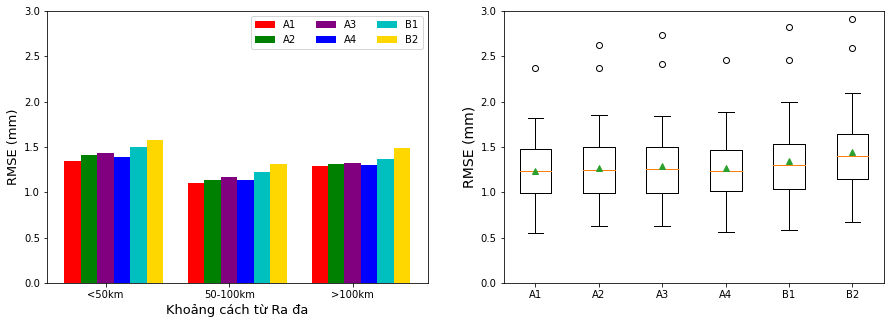

In [21]:
#bar_plot
plt.figure(figsize=(15,5))
plt.subplot(121)
bar_width = 0.04
plt.bar(RMSE['Ranges'],RMSE["R_Z_ZDR_KDP"],color='red',width=bar_width,label="A1")#, linewidth=2,color='red', label="CC_Z_ZDR_KDP",marker='o',markersize = 8)
plt.bar(RMSE['Ranges']+bar_width,RMSE["R_Z_ZDR"],color='green',width=bar_width,label="A2") #linewidth=2,color='green', label="CC_Z_ZDR",marker='o',markersize = 8)
plt.bar(RMSE['Ranges']+bar_width+bar_width,RMSE["R_Z"],color='purple',width=bar_width,label="A3") #, linewidth=2,color='black', label="CC_Z",marker='o',markersize = 8)
plt.bar(RMSE['Ranges']+bar_width+bar_width+bar_width,RMSE["R_KDP"],color='blue',width=bar_width,label="A4")#, linewidth=2,color='blue', label="CC_KDP",marker='o',markersize = 8)
plt.bar(RMSE['Ranges']+bar_width+bar_width+bar_width+bar_width,RMSE["R_Z_noSVM"],color='c',width=bar_width,label="B1")
plt.bar(RMSE['Ranges']+bar_width+bar_width+bar_width+bar_width+bar_width,RMSE["R_Marshall"],color='gold',width=bar_width,label="B2")
plt.xlabel('Khoảng cách từ Ra đa', fontsize = 13)
plt.ylabel('RMSE (mm)', fontsize = 13)
plt.ylim(0.0,3)
plt.grid(False)
plt.legend(loc='upper right',ncol=3)
plt.xticks(CC['Ranges']+bar_width+bar_width,['<50km', '50-100km', '>100km']);
#box plot
plt.subplot(122)
data = [RMSE1['RMSE_R_Z_ZDR_KDP'],RMSE1['RMSE_R_Z_ZDR'],RMSE1['RMSE_R_Z'],RMSE1['RMSE_R_KDP'],RMSE1['RMSE_R_Z_noSVM'],RMSE1['RMSE_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4","B1","B2"])
plt.ylim([0.0,3])
plt.ylabel('RMSE (mm)', fontsize=14);

In [22]:
def me(y,yhat):
    tr=(yhat-y)
    me=round(tr.sum()/tr.count(),2)
    return me
ME_R_Z_ZDR_KDP=[]
ME_R_KDP=[]
ME_R_Z_ZDR=[]
ME_R_Z=[]
ME_R_Z_noSVM=[]
ME_R_Marshall=[]
for i in[*range(0,len(stations['Ranges']),1)]:
    sheet1=df_1.loc[(df_1.Ranges==stations['Ranges'][i])]
    sheet2=df_2.loc[(df_2.Ranges==stations['Ranges'][i])]
    ME_R_Z_ZDR_KDP.append(round(me(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP']),2))
    ME_R_KDP.append(round(me(sheet1['R_10p'],sheet1['R_KDP']),2))
    ME_R_Z_ZDR.append(round(me(sheet2['R_10p'],sheet2['R_Z_ZDR']),2))
    ME_R_Z.append(round(me(sheet2['R_10p'],sheet2['R_Z']),2))
    ME_R_Z_noSVM.append(round(me(sheet2['R_10p'],sheet2['R_Z_noSVM']),2))
    ME_R_Marshall.append(round(me(sheet2['R_10p'],sheet2['R_Marshall']),2))
ME1=pd.DataFrame(data={
    'Ranges': stations['Ranges'],
    'Stations':stations['Tên Trạm'],
    'ME_R_Z_ZDR_KDP': ME_R_Z_ZDR_KDP,
    'ME_R_KDP': ME_R_KDP,
    'ME_R_Z_ZDR': ME_R_Z_ZDR,
    'ME_R_Z': ME_R_Z,
    'ME_R_Z_noSVM': ME_R_Z_noSVM,
    'ME_R_Marshall':ME_R_Marshall})
ME=pd.DataFrame(data={
    'Ranges': [1,1.3,1.6],
    'R_Z_ZDR_KDP': [ME1.loc[ME1['Ranges']<50.0]['ME_R_Z_ZDR_KDP'].mean(),ME1.loc[(ME1['Ranges']>50.0) & (ME1['Ranges']<100.0)]['ME_R_Z_ZDR_KDP'].mean(),ME1.loc[ME1['Ranges']>100.0]['ME_R_Z_ZDR_KDP'].mean()],
    'R_KDP': [ME1.loc[ME1['Ranges']<50.0]['ME_R_KDP'].mean(),ME1.loc[(ME1['Ranges']>50.0) & (ME1['Ranges']<100.0)]['ME_R_KDP'].mean(),ME1.loc[ME1['Ranges']>100.0]['ME_R_KDP'].mean()],
    'R_Z_ZDR': [ME1.loc[ME1['Ranges']<50.0]['ME_R_Z_ZDR'].mean(),ME1.loc[(ME1['Ranges']>50.0) & (ME1['Ranges']<100.0)]['ME_R_Z_ZDR'].mean(),ME1.loc[ME1['Ranges']>100.0]['ME_R_Z_ZDR'].mean()],
    'R_Z': [ME1.loc[ME1['Ranges']<50.0]['ME_R_Z'].mean(),ME1.loc[(ME1['Ranges']>50.0) & (ME1['Ranges']<100.0)]['ME_R_Z'].mean(),ME1.loc[ME1['Ranges']>100.0]['ME_R_Z'].mean()],
    'R_Z_noSVM': [ME1.loc[ME1['Ranges']<50.0]['ME_R_Z_noSVM'].mean(),ME1.loc[(ME1['Ranges']>50.0) & (ME1['Ranges']<100.0)]['ME_R_Z_noSVM'].mean(),ME1.loc[ME1['Ranges']>100.0]['ME_R_Z_noSVM'].mean()],
    'R_Marshall':[ME1.loc[ME1['Ranges']<50.0]['ME_R_Marshall'].mean(),ME1.loc[(ME1['Ranges']>50.0) & (ME1['Ranges']<100.0)]['ME_R_Marshall'].mean(),ME1.loc[ME1['Ranges']>100.0]['ME_R_Marshall'].mean()]    
})
ME

,Ranges,R_Z_ZDR_KDP,R_KDP,R_Z_ZDR,R_Z,R_Z_noSVM,R_Marshall
0,1.0,-0.313000,-0.288000,-0.311000,-0.287000,-0.313000,-0.653000
1,1.3,-0.216667,-0.231111,-0.210556,-0.184444,-0.208889,-0.577222
2,1.6,-0.338889,-0.321111,-0.345926,-0.320000,-0.330741,-0.694815


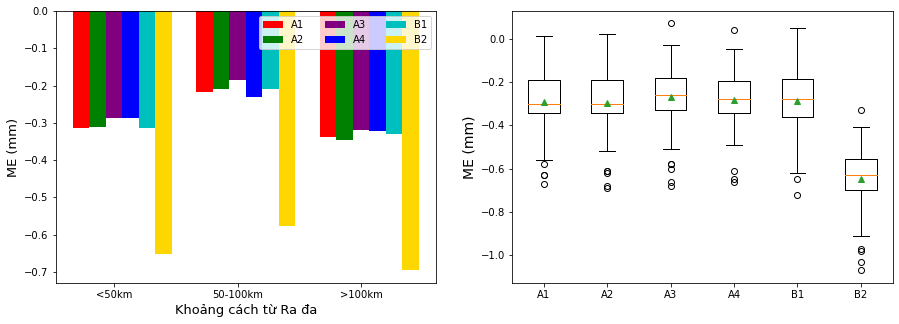

In [23]:
#bar_plot
plt.figure(figsize=(15,5))
plt.subplot(121)
bar_width = 0.04
plt.bar(ME['Ranges'],ME["R_Z_ZDR_KDP"],color='red',width=bar_width,label="A1")#, linewidth=2,color='red', label="CC_Z_ZDR_KDP",marker='o',markersize = 8)
plt.bar(ME['Ranges']+bar_width,ME["R_Z_ZDR"],color='green',width=bar_width,label="A2") #linewidth=2,color='green', label="CC_Z_ZDR",marker='o',markersize = 8)
plt.bar(ME['Ranges']+bar_width+bar_width,ME["R_Z"],color='purple',width=bar_width,label="A3") #, linewidth=2,color='black', label="CC_Z",marker='o',markersize = 8)
plt.bar(ME['Ranges']+bar_width+bar_width+bar_width,ME["R_KDP"],color='blue',width=bar_width,label="A4")#, linewidth=2,color='blue', label="CC_KDP",marker='o',markersize = 8)
plt.bar(ME['Ranges']+bar_width+bar_width+bar_width+bar_width,ME["R_Z_noSVM"],color='c',width=bar_width,label="B1")
plt.bar(ME['Ranges']+bar_width+bar_width+bar_width+bar_width+bar_width,ME["R_Marshall"],color='gold',width=bar_width,label="B2")
plt.xlabel('Khoảng cách từ Ra đa', fontsize = 13)
plt.ylabel('ME (mm)', fontsize = 13)
#plt.ylim(0.0,-1)
plt.grid(False)
plt.legend(loc='upper right',ncol=3)
plt.xticks(ME['Ranges']+bar_width+bar_width,['<50km', '50-100km', '>100km']);
#box plot
plt.subplot(122)
data = [ME1['ME_R_Z_ZDR_KDP'],ME1['ME_R_Z_ZDR'],ME1['ME_R_Z'],ME1['ME_R_KDP'],ME1['ME_R_Z_noSVM'],ME1['ME_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4","B1","B2"])
#plt.ylim([0.0,-1])
plt.ylabel('ME (mm)', fontsize=14);


In [25]:
def Bias(R,G):
    bias=((R.sum()-G.sum())/G.sum())*100
    return round(bias,2)
bias_R_Z_ZDR_KDP=[]
bias_R_KDP=[]
bias_R_Z_ZDR=[]
bias_R_Z=[]
bias_R_Z_noSVM=[]
bias_R_Marshall=[]
for i in[*range(0,len(stations['Ranges']),1)]:
    sheet1=df_1.loc[(df_1.Ranges==stations['Ranges'][i])]
    sheet2=df_2.loc[(df_2.Ranges==stations['Ranges'][i])]
    bias_R_Z_ZDR_KDP.append(Bias(sheet1['R_Z_ZDR_KDP'],sheet1['R_10p']))
    bias_R_KDP.append(Bias(sheet1['R_KDP'],sheet1['R_10p']))
    bias_R_Z_ZDR.append(Bias(sheet2['R_Z_ZDR'],sheet2['R_10p']))
    bias_R_Z.append(Bias(sheet2['R_Z'],sheet2['R_10p']))
    bias_R_Z_noSVM.append(Bias(sheet2['R_Z_noSVM'],sheet2['R_10p']))
    bias_R_Marshall.append(Bias(sheet2['R_Marshall'],sheet2['R_10p']))
Bias1=pd.DataFrame(data={
    'Ranges': stations['Ranges'],
    'Stations':stations['Tên Trạm'],
    'Bias_R_Z_ZDR_KDP': bias_R_Z_ZDR_KDP,
    'Bias_R_KDP': bias_R_KDP,
    'Bias_R_Z_ZDR': bias_R_Z_ZDR,
    'Bias_R_Z': bias_R_Z,
    'Bias_R_Z_noSVM': bias_R_Z_noSVM,
    'Bias_R_Marshall':bias_R_Marshall})
BIAS=pd.DataFrame(data={
    'Ranges': [1,1.3,1.6],
    'R_Z_ZDR_KDP': [Bias1.loc[Bias1['Ranges']<50.0]['Bias_R_Z_ZDR_KDP'].mean(),Bias1.loc[(Bias1['Ranges']>50.0) & (Bias1['Ranges']<100.0)]['Bias_R_Z_ZDR_KDP'].mean(),Bias1.loc[Bias1['Ranges']>100.0]['Bias_R_Z_ZDR_KDP'].mean()],
    'R_KDP': [Bias1.loc[Bias1['Ranges']<50.0]['Bias_R_KDP'].mean(),Bias1.loc[(Bias1['Ranges']>50.0) & (Bias1['Ranges']<100.0)]['Bias_R_KDP'].mean(),Bias1.loc[RMSE1['Ranges']>100.0]['Bias_R_KDP'].mean()],
    'R_Z_ZDR': [Bias1.loc[Bias1['Ranges']<50.0]['Bias_R_Z_ZDR'].mean(),Bias1.loc[(Bias1['Ranges']>50.0) & (Bias1['Ranges']<100.0)]['Bias_R_Z_ZDR'].mean(),Bias1.loc[Bias1['Ranges']>100.0]['Bias_R_Z_ZDR'].mean()],
    'R_Z': [Bias1.loc[Bias1['Ranges']<50.0]['Bias_R_Z'].mean(),Bias1.loc[(Bias1['Ranges']>50.0) & (Bias1['Ranges']<100.0)]['Bias_R_Z'].mean(),Bias1.loc[Bias1['Ranges']>100.0]['Bias_R_Z'].mean()],
    'R_Z_noSVM': [Bias1.loc[Bias1['Ranges']<50.0]['Bias_R_Z_noSVM'].mean(),Bias1.loc[(Bias1['Ranges']>50.0) & (Bias1['Ranges']<100.0)]['Bias_R_Z_noSVM'].mean(),Bias1.loc[Bias1['Ranges']>100.0]['Bias_R_Z_noSVM'].mean()],
    'R_Marshall':[Bias1.loc[Bias1['Ranges']<50.0]['Bias_R_Marshall'].mean(),Bias1.loc[(Bias1['Ranges']>50.0) & (Bias1['Ranges']<100.0)]['Bias_R_Marshall'].mean(),Bias1.loc[Bias1['Ranges']>100.0]['Bias_R_Marshall'].mean()]
    
})
BIAS

,Ranges,R_Z_ZDR_KDP,R_KDP,R_Z_ZDR,R_Z,R_Z_noSVM,R_Marshall
0,1.0,-34.960000,-32.069000,-35.740000,-32.881000,-35.932000,-76.075000
1,1.3,-25.323333,-27.326667,-24.623333,-21.220556,-24.202778,-71.423333
2,1.6,-34.131481,-32.140000,-37.128519,-34.228148,-35.288148,-78.428148


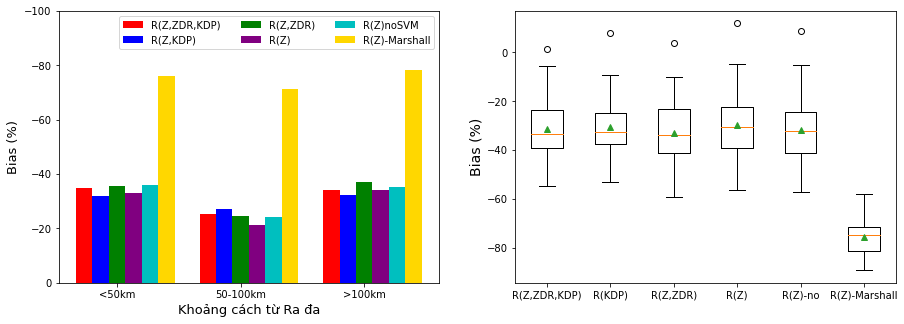

In [26]:
#bar_plot
plt.figure(figsize=(15,5))
plt.subplot(121)
bar_width = 0.04
plt.bar(BIAS['Ranges'],BIAS["R_Z_ZDR_KDP"],color='red',width=bar_width,label="R(Z,ZDR,KDP)")#, linewidth=2,color='red', label="CC_Z_ZDR_KDP",marker='o',markersize = 8)
plt.bar(BIAS['Ranges']+bar_width,BIAS["R_KDP"],color='blue',width=bar_width,label="R(Z,KDP)")#, linewidth=2,color='blue', label="CC_KDP",marker='o',markersize = 8)
plt.bar(BIAS['Ranges']+bar_width+bar_width,BIAS["R_Z_ZDR"],color='green',width=bar_width,label="R(Z,ZDR)") #linewidth=2,color='green', label="CC_Z_ZDR",marker='o',markersize = 8)
plt.bar(BIAS['Ranges']+bar_width+bar_width+bar_width,BIAS["R_Z"],color='purple',width=bar_width,label="R(Z)") #, linewidth=2,color='black', label="CC_Z",marker='o',markersize= 8)
plt.bar(BIAS['Ranges']+bar_width+bar_width+bar_width+bar_width,BIAS["R_Z_noSVM"],color='c',width=bar_width,label="R(Z)noSVM") 
plt.bar(BIAS['Ranges']+bar_width+bar_width+bar_width+bar_width+bar_width,BIAS["R_Marshall"],color='gold',width=bar_width,label="R(Z)-Marshall")
plt.xlabel('Khoảng cách từ Ra đa', fontsize = 13)
plt.ylabel('Bias (%)', fontsize = 13)
plt.ylim(0,-100)
plt.grid(False)
plt.legend(loc='upper right',ncol=3)
plt.xticks(CC['Ranges']+bar_width+bar_width,['<50km', '50-100km', '>100km']);
#box plot
plt.subplot(122)
data = [Bias1['Bias_R_Z_ZDR_KDP'],Bias1['Bias_R_KDP'],Bias1['Bias_R_Z_ZDR'],Bias1['Bias_R_Z'],Bias1['Bias_R_Z_noSVM'],Bias1['Bias_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["R(Z,ZDR,KDP)","R(KDP)","R(Z,ZDR)","R(Z)","R(Z)-no","R(Z)-Marshall"])
#plt.ylim([0,1])
plt.ylabel('Bias (%)', fontsize=14);

In [137]:
df_1[df_1['times'].str.contains('/03')]

,Ranges,Stations,times,Event,SC_SVM,R_10p,R_Z_ZDR_KDP,R_KDP
591,61.58,Chiềng Mai,19:10 15/03,2,1,0.6,1.070440,0.914880
592,77.11,Nậm Hàng 2,19:10 15/03,2,1,1.2,0.262804,0.320273
593,92.60,Chiềng On,19:10 15/03,2,2,0.4,1.168991,1.119716
594,95.39,Mường Mô 1,19:10 15/03,2,1,0.2,0.516244,0.391065
595,109.30,Mường Hum,19:10 15/03,2,1,0.6,0.815191,0.602718
...,...,...,...,...,...,...,...,...
1741,83.91,Dương Quỳ,01:00 23/03,4,1,0.6,0.631256,0.530541
1742,94.85,Văn Bàn,01:00 23/03,4,1,0.2,0.534872,0.443279
1743,106.05,Làng Cang,01:00 23/03,4,1,1.0,0.903535,0.940274
1744,109.23,Bảo Hà 1,01:00 23/03,4,1,0.2,0.609623,0.541090


# Xét theo tháng

In [138]:
#Detection Events
df_de=pd.read_excel('C:/Users/Admin/OneDrive/Desktop/Practice SVM/Frequency/detec_event2.xlsx',sheet_name='mm')

In [90]:
df_de

,Unnamed: 0,Ranges,Stations,times,Event,SC_SVM,R_10p,R_Z_ZDR_KDP,R_Z_ZDR,R_Z,R_KDP,R_Z_noSVM,R_Marshall
0,2,19.16,Chiềng Ơn,05:10 19/02,1,1.0,0.2,0.319690,0.303624,0.350902,0.487324,0.339710,0.038315
1,3,22.09,Thuận Châu,05:10 19/02,1,1.0,1.4,0.641118,0.652246,0.729544,0.587215,0.783947,0.336220
2,4,23.07,Nậm Ét,05:10 19/02,1,1.0,1.6,0.437038,0.367901,0.418314,0.729860,0.417426,0.077758
3,7,31.40,Nậm Giôn,05:10 19/02,1,1.0,6.8,0.993888,0.758571,1.074796,1.534604,0.849492,0.523809
4,8,31.77,Mường Ảng,05:10 19/02,1,1.0,0.4,0.376723,0.415191,0.453626,0.427169,0.456079,0.085486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,33972,114.62,Bát Xát,13:00 26/08,23,1.0,0.2,0.254884,0.275606,0.287115,0.367958,0.269925,0.020624
13690,33973,114.99,Bản Lang,13:00 26/08,23,1.0,0.2,0.442459,0.475508,0.489157,0.456445,0.496058,0.099329
13691,33976,120.21,Pa Nậm Cúm,13:00 26/08,23,1.0,0.4,0.470478,0.468925,0.491828,0.537792,0.499375,0.102587
13692,33978,122.11,Ý Tý,13:00 26/08,23,1.0,0.4,0.233205,0.297303,0.298713,0.276654,0.282329,0.022919


In [91]:
de_R_Z_ZDR_KDP=[]
de_R_KDP=[]
de_R_Z_ZDR=[]
de_R_Z=[]
de_R_Z_noSVM=[]
de_R_Marshall=[]
month=["02","03","04","05","06","07","08"]
for i in month:
    de_R_Z_ZDR_KDP.append(round(len(df_de.loc[((df_de['times'].str.contains(i))&((df_de.R_Z_ZDR_KDP)>0.2))])/len(df_de.loc[(df_de['times'].str.contains(i))]),2)*100)
    de_R_KDP.append(round(len(df_de.loc[((df_de['times'].str.contains(i))&((df_de.R_KDP)>0.2))])/len(df_de.loc[(df_de['times'].str.contains(i))]),2)*100)
    de_R_Z_ZDR.append(round(len(df_de.loc[((df_de['times'].str.contains(i))&((df_de.R_Z_ZDR)>0.2))])/len(df_de.loc[(df_de['times'].str.contains(i))]),2)*100)
    de_R_Z.append(round(len(df_de.loc[((df_de['times'].str.contains(i))&((df_de.R_Z)>0.2))])/len(df_de.loc[(df_de['times'].str.contains(i))]),2)*100)
    de_R_Z_noSVM.append(round(len(df_de.loc[((df_de['times'].str.contains(i))&((df_de.R_Z_noSVM)>0.2))])/len(df_de.loc[(df_de['times'].str.contains(i))]),2)*100)
    de_R_Marshall.append(round(len(df_de.loc[((df_de['times'].str.contains(i))&((df_de.R_Marshall)>0.2))])/len(df_de.loc[(df_de['times'].str.contains(i))]),2)*100)
DE=pd.DataFrame(data={
    'Month': month,
    'de_R_Z_ZDR_KDP': de_R_Z_ZDR_KDP,
    'de_R_KDP': de_R_KDP,
    'de_R_Z_ZDR': de_R_Z_ZDR,
    'de_R_Z': de_R_Z,
    'de_R_Z_noSVM': de_R_Z_noSVM,
    'de_R_Marshall':de_R_Marshall
    
})
DE

,Month,de_R_Z_ZDR_KDP,de_R_KDP,de_R_Z_ZDR,de_R_Z,de_R_Z_noSVM,de_R_Marshall
0,02,83.0,85.0,95.0,97.0,95.0,29.0
1,03,86.0,88.0,95.0,96.0,95.0,35.0
2,04,86.0,87.0,94.0,95.0,94.0,36.0
3,05,80.0,82.0,93.0,96.0,93.0,24.0
4,06,95.0,96.0,99.0,99.0,99.0,40.0
5,07,90.0,91.0,97.0,97.0,96.0,44.0
6,08,92.0,93.0,98.0,99.0,98.0,29.0


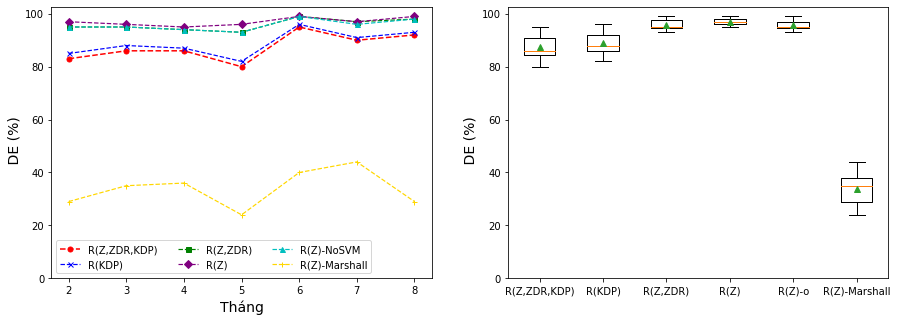

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=DE['Month']
plt.plot(events,DE['de_R_Z_ZDR_KDP'], linewidth=1.5,color='red', label="R(Z,ZDR,KDP)",marker='o',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_KDP'], linewidth=1.2,color='blue', label="R(KDP)",marker='x',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Z_ZDR'], linewidth=1.2,color='green', label="R(Z,ZDR)",marker='s',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Z'], linewidth=1.2,color='purple', label="R(Z)",marker='D',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Z_noSVM'], linewidth=1.2,color='c', label="R(Z)-NoSVM",marker='^',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Marshall'], linewidth=1.2,color='gold', label="R(Z)-Marshall",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Tháng', fontsize=14)
#plt.ylim([0,1])
plt.ylabel(' DE (%)', fontsize=14)
plt.grid(False)
plt.legend(loc='lower left', ncol=3)
plt.xticks(DE['Month'],[2,3,4,5,6,7,8])
plt.yticks(np.arange(0, 120, step=20))
#Box
plt.subplot(122)
data = [DE['de_R_Z_ZDR_KDP'],DE['de_R_KDP'],DE['de_R_Z_ZDR'],DE['de_R_Z'],DE['de_R_Z_noSVM'],DE['de_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["R(Z,ZDR,KDP)","R(KDP)","R(Z,ZDR)","R(Z)","R(Z)-o","R(Z)-Marshall"])
plt.yticks(np.arange(0, 120, step=20))
plt.ylabel(' DE (%)', fontsize=14);

CC

In [93]:
cc_R_Z_ZDR_KDP=[]
cc_R_KDP=[]
cc_R_Z_ZDR=[]
cc_R_Z=[]
cc_R_Marshall=[]
cc_R_Z_noSVM=[]
month=["/02","/03","/04","/05","/06","/07","/08"]
for i in month:
    sheet1=df_1[df_1['times'].str.contains(i)]
    sheet2=df_2[df_2['times'].str.contains(i)]
    cc_R_Z_ZDR_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP'])[0,1])
    cc_R_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_KDP'])[0,1])
    cc_R_Z_ZDR.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_ZDR'])[0,1])
    cc_R_Z.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z'])[0,1])
    cc_R_Z_noSVM.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_noSVM'])[0,1])
    cc_R_Marshall.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Marshall'])[0,1])
CC=pd.DataFrame(data={
    'Month': month,
    'CC_R_Z_ZDR_KDP': cc_R_Z_ZDR_KDP,
    'CC_R_KDP': cc_R_KDP,
    'CC_R_Z_ZDR': cc_R_Z_ZDR,
    'CC_R_Z': cc_R_Z,
    'CC_R_Z_noSVM':cc_R_Z_noSVM,
    'CC_R_Marshall':cc_R_Marshall
    
})

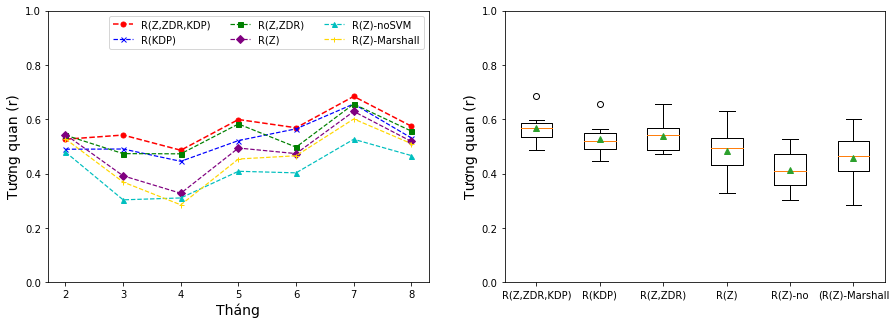

In [94]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=CC['Month']
plt.plot(events,CC['CC_R_Z_ZDR_KDP'], linewidth=1.5,color='red', label="R(Z,ZDR,KDP)",marker='o',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_KDP'], linewidth=1.2,color='blue', label="R(KDP)",marker='x',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Z_ZDR'], linewidth=1.2,color='green', label="R(Z,ZDR)",marker='s',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Z'], linewidth=1.2,color='purple', label="R(Z)",marker='D',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Z_noSVM'], linewidth=1.2,color='c', label="R(Z)-noSVM",marker='^',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Marshall'], linewidth=1.2,color='gold', label="R(Z)-Marshall",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Tháng', fontsize=14)
plt.ylim([0,1])
plt.ylabel('Tương quan (r)', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=3)
plt.xticks(CC['Month'],[2,3,4,5,6,7,8])
#Box plot
plt.subplot(122)
data = [CC['CC_R_Z_ZDR_KDP'],CC['CC_R_KDP'],CC['CC_R_Z_ZDR'],CC['CC_R_Z'],CC['CC_R_Z_noSVM'],CC['CC_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["R(Z,ZDR,KDP)","R(KDP)","R(Z,ZDR)","R(Z)","R(Z)-no","(R(Z)-Marshall"])
plt.ylim([0,1])
plt.ylabel('Tương quan (r)', fontsize=14);

In [95]:
RMSE_R_Z_ZDR_KDP=[]
RMSE_R_KDP=[]
RMSE_R_Z_ZDR=[]
RMSE_R_Z=[]
RMSE_R_Marshall=[]
RMSE_R_Z_noSVM=[]
month=["/02","/03","/04","/05","/06","/07","/08"]
for i in month:
    sheet1=df_1[df_1['times'].str.contains(i)]
    sheet2=df_2[df_2['times'].str.contains(i)]
    RMSE_R_Z_ZDR_KDP.append(round(np.sqrt(metrics.mean_squared_error(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP'])),2))
    RMSE_R_KDP.append(round(np.sqrt(metrics.mean_squared_error(sheet1['R_10p'],sheet1['R_KDP'])),2))
    RMSE_R_Z_ZDR.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z_ZDR'])),2))
    RMSE_R_Z.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z'])),2))
    RMSE_R_Z_noSVM.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z_noSVM'])),2))
    RMSE_R_Marshall.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Marshall'])),2))
RMSE=pd.DataFrame(data={
    'Month': month,
    'RMSE_R_Z_ZDR_KDP': RMSE_R_Z_ZDR_KDP,
    'RMSE_R_KDP': RMSE_R_KDP,
    'RMSE_R_Z_ZDR': RMSE_R_Z_ZDR,
    'RMSE_R_Z': RMSE_R_Z,
    'RMSE_R_Z_noSVM': RMSE_R_Z_noSVM,
    'RMSE_R_Marshall':RMSE_R_Marshall
    
})

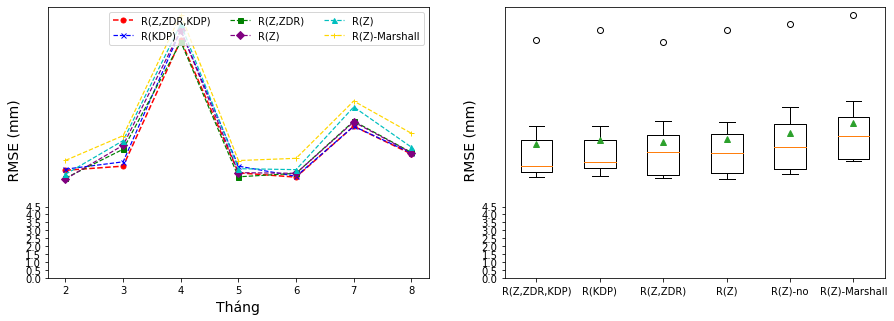

In [96]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=RMSE['Month']
plt.plot(events,RMSE['RMSE_R_Z_ZDR_KDP'], linewidth=1.5,color='red', label="R(Z,ZDR,KDP)",marker='o',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_KDP'], linewidth=1.2,color='blue', label="R(KDP)",marker='x',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Z_ZDR'], linewidth=1.2,color='green', label="R(Z,ZDR)",marker='s',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Z'], linewidth=1.2,color='purple', label="R(Z)",marker='D',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Z_noSVM'], linewidth=1.2,color='c', label="R(Z)",marker='^',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Marshall'], linewidth=1.2,color='gold', label="R(Z)-Marshall",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Tháng', fontsize=14)
#plt.ylim([0,1])
plt.ylabel(' RMSE (mm)', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=3)
plt.xticks(CC['Month'],[2,3,4,5,6,7,8])
plt.yticks(np.arange(0, 5, step=0.5))
#Box
plt.subplot(122)
data = [RMSE['RMSE_R_Z_ZDR_KDP'],RMSE['RMSE_R_KDP'],RMSE['RMSE_R_Z_ZDR'],RMSE['RMSE_R_Z'],RMSE['RMSE_R_Z_noSVM'],RMSE['RMSE_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["R(Z,ZDR,KDP)","R(KDP)","R(Z,ZDR)","R(Z)","R(Z)-no","R(Z)-Marshall"])
plt.yticks(np.arange(0, 5, step=0.5))
plt.ylabel(' RMSE (mm)', fontsize=14);

In [97]:
def Bias(R,G):
    bias=((R.sum()-G.sum())/G.sum())*100
    return round(bias,2)
bias_R_Z_ZDR_KDP=[]
bias_R_KDP=[]
bias_R_Z_ZDR=[]
bias_R_Z=[]
bias_R_Z_noSVM=[]
bias_R_Marshall=[]
month=["/02","/03","/04","/05","/06","/07","/08"]
for i in month:
    sheet1=df_1[df_1['times'].str.contains(i)]
    sheet2=df_2[df_2['times'].str.contains(i)]
    bias_R_Z_ZDR_KDP.append(Bias(sheet1['R_Z_ZDR_KDP'],sheet1['R_10p']))
    bias_R_KDP.append(Bias(sheet1['R_KDP'],sheet1['R_10p']))
    bias_R_Z_ZDR.append(Bias(sheet2['R_Z_ZDR'],sheet2['R_10p']))
    bias_R_Z.append(Bias(sheet2['R_Z'],sheet2['R_10p']))
    bias_R_Z_noSVM.append(Bias(sheet2['R_Z_noSVM'],sheet2['R_10p']))
    bias_R_Marshall.append(Bias(sheet2['R_Marshall'],sheet2['R_10p']))
Bias=pd.DataFrame(data={
    'Month': month,
    'bias_R_Z_ZDR_KDP': bias_R_Z_ZDR_KDP,
    'bias_R_KDP': bias_R_KDP,
    'bias_R_Z_ZDR': bias_R_Z_ZDR,
    'bias_R_Z': bias_R_Z,
    'bias_R_Z_noSVM': bias_R_Z_noSVM,
    'bias_R_Marshall':bias_R_Marshall
    
})

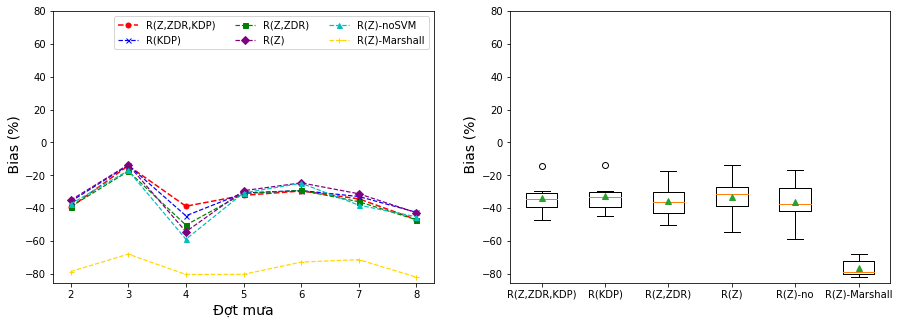

In [98]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=Bias['Month']
plt.plot(events,Bias['bias_R_Z_ZDR_KDP'], linewidth=1.5,color='red', label="R(Z,ZDR,KDP)",marker='o',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_KDP'], linewidth=1.2,color='blue', label="R(KDP)",marker='x',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Z_ZDR'], linewidth=1.2,color='green', label="R(Z,ZDR)",marker='s',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Z'], linewidth=1.2,color='purple', label="R(Z)",marker='D',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Z_noSVM'], linewidth=1.2,color='c', label="R(Z)-noSVM",marker='^',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Marshall'], linewidth=1.2,color='gold', label="R(Z)-Marshall",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Đợt mưa', fontsize=14)
#plt.ylim([0,1])
plt.ylabel(' Bias (%)', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=3)
plt.xticks(CC['Month'],[2,3,4,5,6,7,8])
plt.yticks(np.arange(-80, 100, step=20))
#Box
plt.subplot(122)
data = [Bias['bias_R_Z_ZDR_KDP'],Bias['bias_R_KDP'],Bias['bias_R_Z_ZDR'],Bias['bias_R_Z'],Bias['bias_R_Z_noSVM'],Bias['bias_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["R(Z,ZDR,KDP)","R(KDP)","R(Z,ZDR)","R(Z)","R(Z)-no","R(Z)-Marshall"])
plt.yticks(np.arange(-80, 100, step=20))
plt.ylabel(' Bias (%)', fontsize=14);

# Tại các events

# CC

In [27]:
cc_R_Z_ZDR_KDP=[]
cc_R_KDP=[]
cc_R_Z_ZDR=[]
cc_R_Z=[]
cc_R_Marshall=[]
cc_R_Z_noSVM=[]
for i in[*range(1,24,1)]:
    sheet1=df_1.loc[(df_1.Event==i)]
    sheet2=df_2.loc[(df_2.Event==i)]
    cc_R_Z_ZDR_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP'])[0,1])
    cc_R_KDP.append(np.corrcoef(sheet1['R_10p'],sheet1['R_KDP'])[0,1])
    cc_R_Z_ZDR.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_ZDR'])[0,1])
    cc_R_Z.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z'])[0,1])
    cc_R_Z_noSVM.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Z_noSVM'])[0,1])
    cc_R_Marshall.append(np.corrcoef(sheet2['R_10p'],sheet2['R_Marshall'])[0,1])
CC=pd.DataFrame(data={
    'Event': list(range(1,24,1)),
    'CC_R_Z_ZDR_KDP': cc_R_Z_ZDR_KDP,
    'CC_R_KDP': cc_R_KDP,
    'CC_R_Z_ZDR': cc_R_Z_ZDR,
    'CC_R_Z': cc_R_Z,
    'CC_R_Z_noSVM': cc_R_Z_noSVM,
    'CC_R_Marshall':cc_R_Marshall
    
})

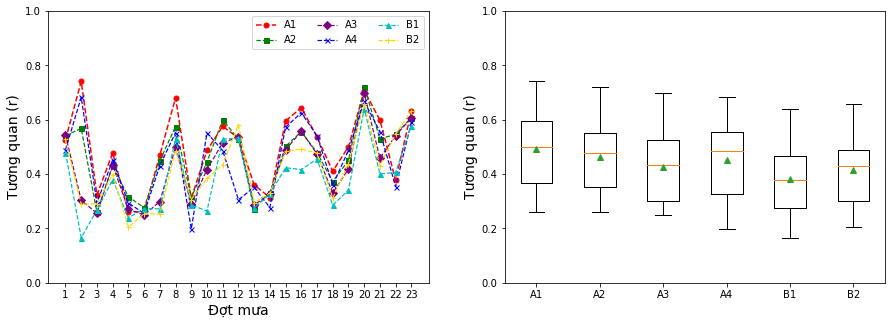

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=CC['Event']
plt.plot(events,CC['CC_R_Z_ZDR_KDP'], linewidth=1.5,color='red', label="A1",marker='o',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Z_ZDR'], linewidth=1.2,color='green', label="A2",marker='s',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Z'], linewidth=1.2,color='purple', label="A3",marker='D',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_KDP'], linewidth=1.2,color='blue', label="A4",marker='x',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Z_noSVM'], linewidth=1.2,color='c', label="B1",marker='^',markersize = 5,linestyle="--")
plt.plot(events, CC['CC_R_Marshall'], linewidth=1.2,color='gold', label="B2",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Đợt mưa', fontsize=14)
plt.ylim([0,1])
plt.ylabel('Tương quan (r)', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=3)
plt.xticks(np.arange(1, 24, step=1))
#Box plot
plt.subplot(122)
data = [CC['CC_R_Z_ZDR_KDP'],CC['CC_R_Z_ZDR'],CC['CC_R_Z'],CC['CC_R_KDP'],CC['CC_R_Z_noSVM'],CC['CC_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4",'B1',"B2"])
plt.ylim([0,1])
plt.ylabel('Tương quan (r)', fontsize=14);

# RMSE

In [29]:
RMSE_R_Z_ZDR_KDP=[]
RMSE_R_KDP=[]
RMSE_R_Z_ZDR=[]
RMSE_R_Z=[]
RMSE_R_Marshall=[]
RMSE_R_Z_noSVM=[]
for i in[*range(1,24,1)]:
    sheet1=df_1.loc[(df_1.Event==i)]
    sheet2=df_2.loc[(df_2.Event==i)]
    RMSE_R_Z_ZDR_KDP.append(round(np.sqrt(metrics.mean_squared_error(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP'])),2))
    RMSE_R_KDP.append(round(np.sqrt(metrics.mean_squared_error(sheet1['R_10p'],sheet1['R_KDP'])),2))
    RMSE_R_Z_ZDR.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z_ZDR'])),2))
    RMSE_R_Z.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z'])),2))
    RMSE_R_Z_noSVM.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Z_noSVM'])),2))
    RMSE_R_Marshall.append(round(np.sqrt(metrics.mean_squared_error(sheet2['R_10p'],sheet2['R_Marshall'])),2))
RMSE=pd.DataFrame(data={
    'Event': list(range(1,24,1)),
    'RMSE_R_Z_ZDR_KDP': RMSE_R_Z_ZDR_KDP,
    'RMSE_R_KDP': RMSE_R_KDP,
    'RMSE_R_Z_ZDR': RMSE_R_Z_ZDR,
    'RMSE_R_Z': RMSE_R_Z,
    'RMSE_R_Z_noSVM': RMSE_R_Z_noSVM,
    'RMSE_R_Marshall':RMSE_R_Marshall
    
})

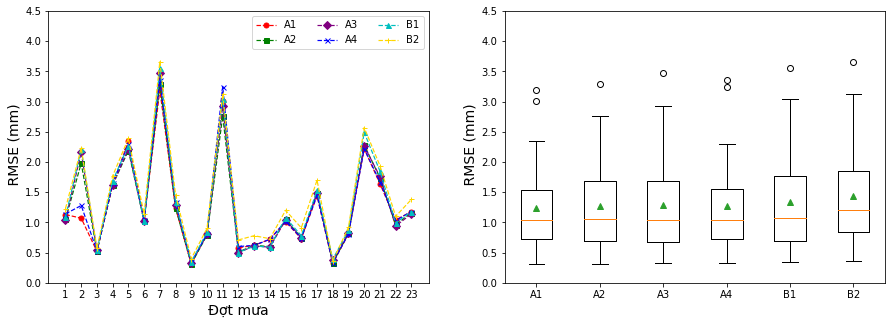

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=RMSE['Event']
plt.plot(events,RMSE['RMSE_R_Z_ZDR_KDP'], linewidth=1.2,color='red', label="A1",marker='o',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Z_ZDR'], linewidth=1.2,color='green', label="A2",marker='s',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Z'], linewidth=1.2,color='purple', label="A3",marker='D',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_KDP'], linewidth=1.2,color='blue', label="A4",marker='x',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Z_noSVM'], linewidth=1.2,color='c', label="B1",marker='^',markersize = 5,linestyle="--")
plt.plot(events, RMSE['RMSE_R_Marshall'], linewidth=1.2,color='gold', label="B2",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Đợt mưa', fontsize=14)
#plt.ylim([0,1])
plt.ylabel(' RMSE (mm)', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=3)
plt.xticks(np.arange(1, 24, step=1))
plt.yticks(np.arange(0, 5, step=0.5))
#Box
plt.subplot(122)
data = [RMSE['RMSE_R_Z_ZDR_KDP'],RMSE['RMSE_R_Z_ZDR'],RMSE['RMSE_R_Z'],RMSE['RMSE_R_KDP'],RMSE['RMSE_R_Z_noSVM'],RMSE['RMSE_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4","B1","B2"])
plt.yticks(np.arange(0, 5, step=0.5))
plt.ylabel(' RMSE (mm)', fontsize=14);

In [31]:
def me(y,yhat):
    tr=(yhat-y)
    me=round(tr.sum()/tr.count(),2)
    return me
ME_R_Z_ZDR_KDP=[]
ME_R_KDP=[]
ME_R_Z_ZDR=[]
ME_R_Z=[]
ME_R_Marshall=[]
ME_R_Z_noSVM=[]
for i in[*range(1,24,1)]:
    sheet1=df_1.loc[(df_1.Event==i)]
    sheet2=df_2.loc[(df_2.Event==i)]
    ME_R_Z_ZDR_KDP.append(round(me(sheet1['R_10p'],sheet1['R_Z_ZDR_KDP']),2))
    ME_R_KDP.append(round(me(sheet1['R_10p'],sheet1['R_KDP']),2))
    ME_R_Z_ZDR.append(round(me(sheet2['R_10p'],sheet2['R_Z_ZDR']),2))
    ME_R_Z.append(round(me(sheet2['R_10p'],sheet2['R_Z']),2))
    ME_R_Z_noSVM.append(round(me(sheet2['R_10p'],sheet2['R_Z_noSVM']),2))
    ME_R_Marshall.append(round(me(sheet2['R_10p'],sheet2['R_Marshall']),2))
ME=pd.DataFrame(data={
    'Event': list(range(1,24,1)),
    'ME_R_Z_ZDR_KDP': ME_R_Z_ZDR_KDP,
    'ME_R_KDP': ME_R_KDP,
    'ME_R_Z_ZDR': ME_R_Z_ZDR,
    'ME_R_Z': ME_R_Z,
    'ME_R_Z_noSVM': ME_R_Z_noSVM,
    'ME_R_Marshall':ME_R_Marshall
    
})

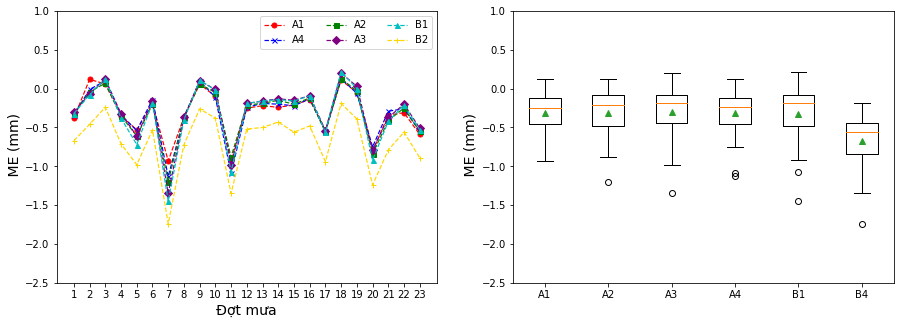

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=ME['Event']
plt.plot(events,ME['ME_R_Z_ZDR_KDP'], linewidth=1.2,color='red', label="A1",marker='o',markersize = 5,linestyle="--")
plt.plot(events, ME['ME_R_KDP'], linewidth=1.2,color='blue', label="A4",marker='x',markersize = 5,linestyle="--")
plt.plot(events, ME['ME_R_Z_ZDR'], linewidth=1.2,color='green', label="A2",marker='s',markersize = 5,linestyle="--")
plt.plot(events, ME['ME_R_Z'], linewidth=1.2,color='purple', label="A3",marker='D',markersize = 5,linestyle="--")
plt.plot(events, ME['ME_R_Z_noSVM'], linewidth=1.2,color='c', label="B1",marker='^',markersize = 5,linestyle="--")
plt.plot(events, ME['ME_R_Marshall'], linewidth=1.2,color='gold', label="B2",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Đợt mưa', fontsize=14)
#plt.ylim([0,1])
plt.ylabel(' ME (mm)', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=3)
plt.xticks(np.arange(1, 24, step=1))
plt.yticks(np.arange(1, -3, step=-0.5))
#Box
plt.subplot(122)
data = [ME['ME_R_Z_ZDR_KDP'],ME['ME_R_Z_ZDR'],ME['ME_R_Z'],ME['ME_R_KDP'],ME['ME_R_Z_noSVM'],ME['ME_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4","B1","B4"])
plt.yticks(np.arange(1, -3, step=-0.5))
plt.ylabel(' ME (mm)', fontsize=14);

# BIAS

In [33]:
def Bias(R,G):
    bias=((R.sum()-G.sum())/G.sum())*100
    return round(bias,2)
bias_R_Z_ZDR_KDP=[]
bias_R_KDP=[]
bias_R_Z_ZDR=[]
bias_R_Z=[]
bias_R_Z_noSVM=[]
bias_R_Marshall=[]
for i in[*range(1,24,1)]:
    sheet1=df_1.loc[(df_1.Event==i)]
    sheet2=df_2.loc[(df_2.Event==i)]
    bias_R_Z_ZDR_KDP.append(Bias(sheet1['R_Z_ZDR_KDP'],sheet1['R_10p']))
    bias_R_KDP.append(Bias(sheet1['R_KDP'],sheet1['R_10p']))
    bias_R_Z_ZDR.append(Bias(sheet2['R_Z_ZDR'],sheet2['R_10p']))
    bias_R_Z.append(Bias(sheet2['R_Z'],sheet2['R_10p']))
    bias_R_Z_noSVM.append(Bias(sheet2['R_Z_noSVM'],sheet2['R_10p']))
    bias_R_Marshall.append(Bias(sheet2['R_Marshall'],sheet2['R_10p']))
Bias=pd.DataFrame(data={
    'Event': list(range(1,24,1)),
    'bias_R_Z_ZDR_KDP': bias_R_Z_ZDR_KDP,
    'bias_R_KDP': bias_R_KDP,
    'bias_R_Z_ZDR': bias_R_Z_ZDR,
    'bias_R_Z': bias_R_Z,
    'bias_R_Z_noSVM': bias_R_Z_noSVM,
    'bias_R_Marshall':bias_R_Marshall
})

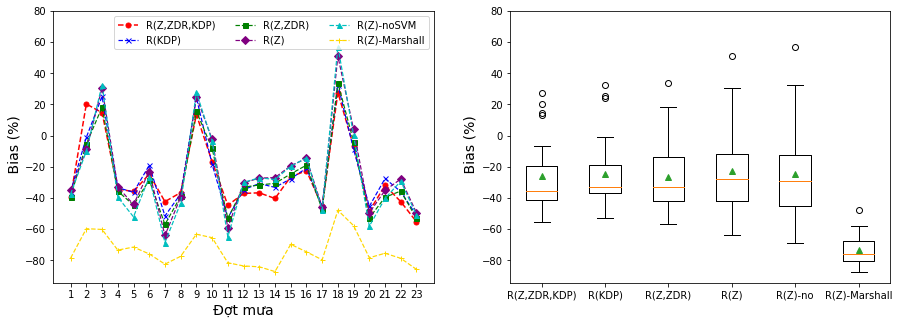

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=Bias['Event']
plt.plot(events,Bias['bias_R_Z_ZDR_KDP'], linewidth=1.5,color='red', label="R(Z,ZDR,KDP)",marker='o',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_KDP'], linewidth=1.2,color='blue', label="R(KDP)",marker='x',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Z_ZDR'], linewidth=1.2,color='green', label="R(Z,ZDR)",marker='s',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Z'], linewidth=1.2,color='purple', label="R(Z)",marker='D',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Z_noSVM'], linewidth=1.2,color='c', label="R(Z)-noSVM",marker='^',markersize = 5,linestyle="--")
plt.plot(events, Bias['bias_R_Marshall'], linewidth=1.2,color='gold', label="R(Z)-Marshall",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Đợt mưa', fontsize=14)
#plt.ylim([0,1])
plt.ylabel(' Bias (%)', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=3)
plt.xticks(np.arange(1, 24, step=1))
plt.yticks(np.arange(-80, 100, step=20))
#Box
plt.subplot(122)
data = [Bias['bias_R_Z_ZDR_KDP'],Bias['bias_R_KDP'],Bias['bias_R_Z_ZDR'],Bias['bias_R_Z'],Bias['bias_R_Z_noSVM'],Bias['bias_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["R(Z,ZDR,KDP)","R(KDP)","R(Z,ZDR)","R(Z)","R(Z)-no","R(Z)-Marshall"])
plt.yticks(np.arange(-80, 100, step=20))
plt.ylabel(' Bias (%)', fontsize=14);

# DETECTION

In [35]:
#Detection Events
df_de=pd.read_excel('C:/Users/Admin/OneDrive/Desktop/Practice SVM/Frequency/detec_event2.xlsx',sheet_name='mm')

In [36]:
de_R_Z_ZDR_KDP=[]
de_R_KDP=[]
de_R_Z_ZDR=[]
de_R_Z=[]
de_R_Z_noSVM=[]
de_R_Marshall=[]
for i in[*range(1,24,1)]:
    de_R_Z_ZDR_KDP.append(round(len(df_de.loc[((df_de.Event==i)&((df_de.R_Z_ZDR_KDP)>0.2))])/len(df_de.loc[(df_de.Event==i)]),2)*100)
    de_R_KDP.append(round(len(df_de.loc[((df_de.Event==i)&((df_de.R_KDP)>0.2))])/len(df_de.loc[(df_de.Event==i)]),2)*100)
    de_R_Z_ZDR.append(round(len(df_de.loc[((df_de.Event==i)&((df_de.R_Z_ZDR)>0.2))])/len(df_de.loc[(df_de.Event==i)]),2)*100)
    de_R_Z.append(round(len(df_de.loc[((df_de.Event==i)&((df_de.R_Z)>0.2))])/len(df_de.loc[(df_de.Event==i)]),2)*100)
    de_R_Z_noSVM.append(round(len(df_de.loc[((df_de.Event==i)&((df_de.R_Z_noSVM)>0.2))])/len(df_de.loc[(df_de.Event==i)]),2)*100)
    de_R_Marshall.append(round(len(df_de.loc[((df_de.Event==i)&((df_de.R_Marshall)>0.2))])/len(df_de.loc[(df_de.Event==i)]),2)*100)
DE=pd.DataFrame(data={
    'Event': list(range(1,24,1)),
    'de_R_Z_ZDR_KDP': de_R_Z_ZDR_KDP,
    'de_R_KDP': de_R_KDP,
    'de_R_Z_ZDR': de_R_Z_ZDR,
    'de_R_Z': de_R_Z,
    'de_R_Z_noSVM': de_R_Z_noSVM,
    'de_R_Marshall':de_R_Marshall
    
})

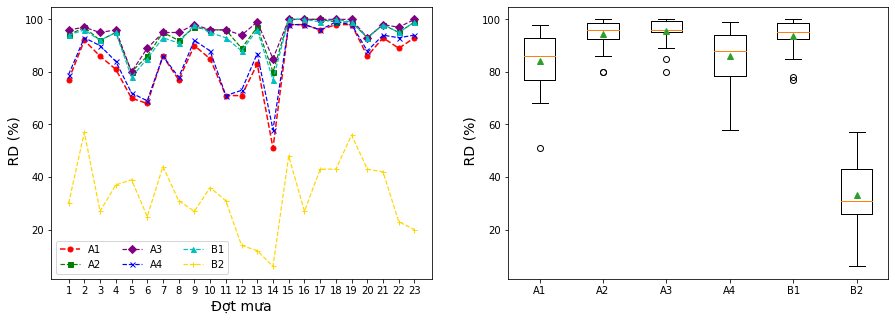

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(121)
events=DE['Event']
plt.plot(events,DE['de_R_Z_ZDR_KDP'], linewidth=1.5,color='red', label="A1",marker='o',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Z_ZDR'], linewidth=1.2,color='green', label="A2",marker='s',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Z'], linewidth=1.2,color='purple', label="A3",marker='D',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_KDP'], linewidth=1.2,color='blue', label="A4",marker='x',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Z_noSVM'], linewidth=1.2,color='c', label="B1",marker='^',markersize = 5,linestyle="--")
plt.plot(events, DE['de_R_Marshall'], linewidth=1.2,color='gold', label="B2",marker='+',markersize = 5,linestyle="--")
#plt.title('Hệ số tương quan', fontsize=25)
plt.xlabel('Đợt mưa', fontsize=14)
#plt.ylim([0,1])
plt.ylabel(' RD (%)', fontsize=14)
plt.grid(False)
plt.legend(loc='lower left', ncol=3)
plt.xticks(np.arange(1, 24, step=1))
#plt.yticks(np.arange(-80, 100, step=20))
#Box
plt.subplot(122)
data = [DE['de_R_Z_ZDR_KDP'],DE['de_R_Z_ZDR'],DE['de_R_Z'],DE['de_R_KDP'],DE['de_R_Z_noSVM'],DE['de_R_Marshall']]
box=plt.boxplot(data,showmeans=True)
plt.xticks([1,2,3,4,5,6],["A1","A2","A3","A4","B1","B2"])
#plt.yticks(np.arange(-80, 100, step=20))
plt.ylabel(' RD (%)', fontsize=14);

Biểu đồ phân tán

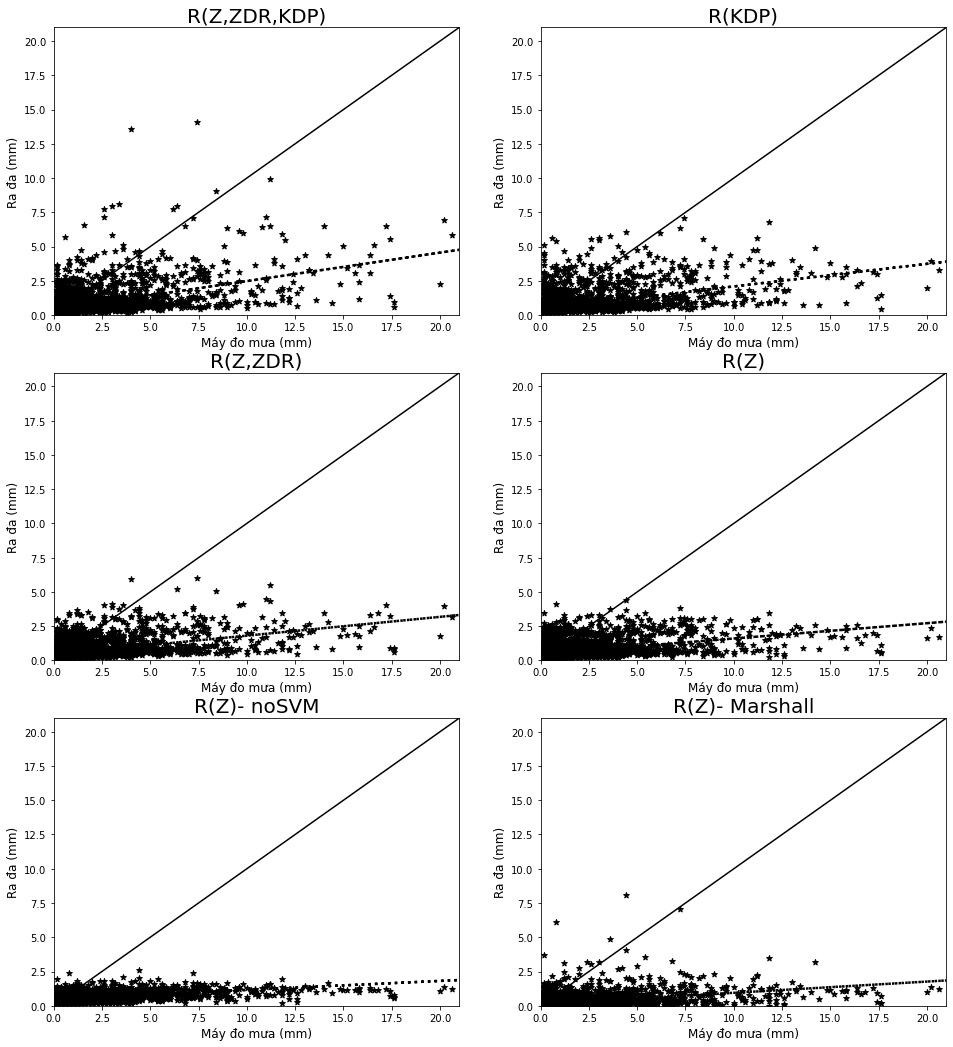

In [41]:
def plot_scatter(X,Y,plt,title,subplot):
    plt.subplot(subplot)        
    plt.title(title, fontsize=20)
    plt.scatter(X,Y,c='black',marker='*')
    plt.xlim(xmin=0.0,xmax=21)
    plt.ylim(ymin=0.0,ymax=21)
    plt.xlabel('Máy đo mưa (mm)', fontsize=12)
    plt.ylabel('Ra đa (mm)', fontsize=12)
    a, b = np.polyfit(X,Y, 1)
    plt.plot(X, a*X+b,c='black', linestyle='dotted',linewidth=2.5)
    myMAX=max(max(X),max(Y))
    plt.plot([0,myMAX],[0,myMAX],color='black')
plt.figure(figsize=(16,18))
plot_scatter(df_1['R_10p'],df_1['R_Z_ZDR_KDP'],plt,"R(Z,ZDR,KDP)",321)
plot_scatter(df_1['R_10p'],df_1['R_KDP'],plt,"R(KDP)",322)
plot_scatter(df_2['R_10p'],df_2['R_Z_ZDR'],plt,"R(Z,ZDR)",323)
plot_scatter(df_2['R_10p'],df_2['R_Z'],plt,"R(Z)",324)
plot_scatter(df_2['R_10p'],df_2['R_Z_noSVM'],plt,"R(Z)- noSVM",325)
plot_scatter(df_2['R_10p'],df_2['R_Marshall'],plt,"R(Z)- Marshall",326);

In [47]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2
rsquared(df_1['R_KDP'],df_1['R_10p'])

0.2820143943382757

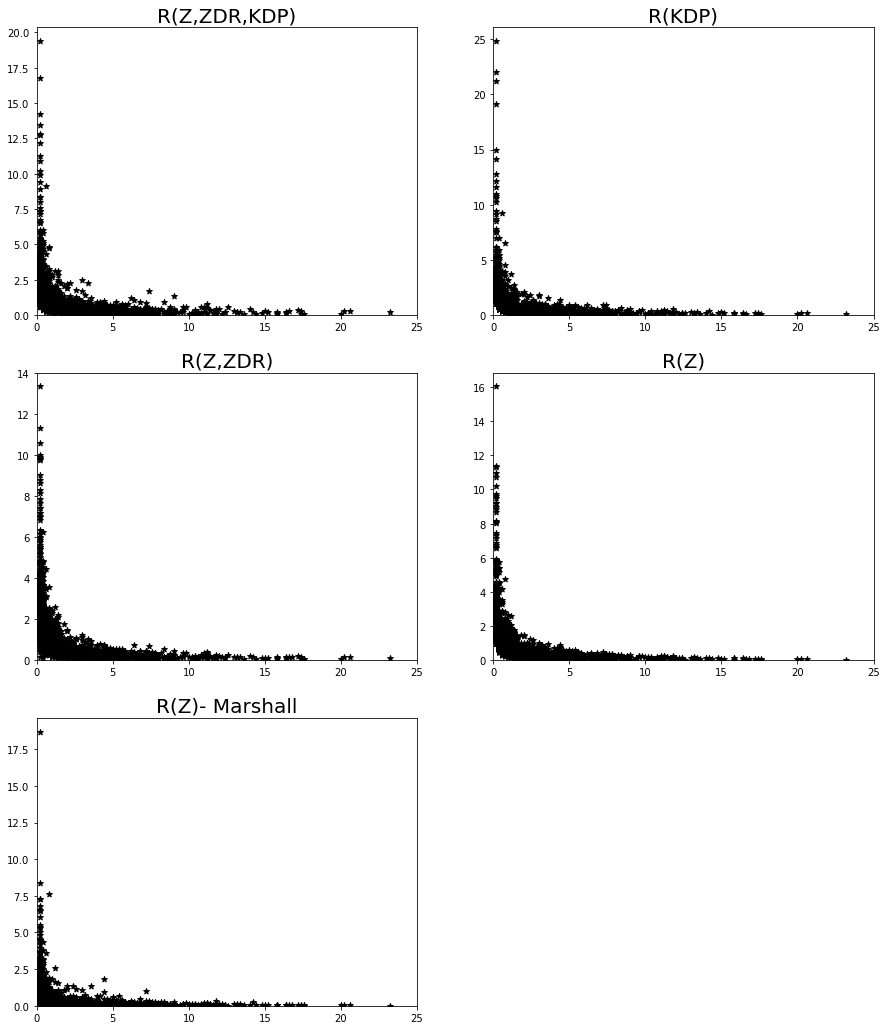

In [91]:
def plot_scatter_2(X,Y,plt,title,subplot):
    plt.subplot(subplot)
    plt.title(title, fontsize=20)
    plt.scatter(X,Y,c='black',marker='*')
    plt.xlim(xmin=0.0,xmax=25)
    plt.ylim(ymin=0.0)
    #myMAX=max(max(X),max(Y))
    plt.plot(np.array([1,]),color='black')
plt.figure(figsize=(15,18))
plot_scatter_2(df_1['R_10p'],df_1['R_Z_ZDR_KDP']/df_1['R_10p'],plt,"R(Z,ZDR,KDP)",321)
plot_scatter_2(df_1['R_10p'],df_1['R_KDP']/df_1['R_10p'],plt,"R(KDP)",322)
plot_scatter_2(df_2['R_10p'],df_2['R_Z_ZDR']/df_2['R_10p'],plt,"R(Z,ZDR)",323)
plot_scatter_2(df_2['R_10p'],df_2['R_Z']/df_2['R_10p'],plt,"R(Z)",324)
plot_scatter_2(df_2['R_10p'],df_2['R_Marshall']/df_2['R_10p'],plt,"R(Z)- Marshall",325)

In [116]:
R_Z_ZDR_KDP=[]
R_KDP=[]
R_Z_ZDR=[]
R_Z=[]
R_Marshall=[]
R_10p1=[]
R_10p2=[]
for i in[*range(1,24,1)]:
    sheet1=df_1.loc[(df_1.Event==i)]
    sheet2=df_2.loc[(df_2.Event==i)]
    R_Z_ZDR_KDP.append(sheet1['R_Z_ZDR_KDP'].mean())
    R_KDP.append(sheet1['R_KDP'].mean())
    R_Z_ZDR.append(sheet2['R_Z_ZDR'].mean())
    R_Z.append(sheet2['R_Z'].mean())
    R_Marshall.append(sheet2['R_Marshall'].mean())
    R_10p1.append(sheet1['R_10p'].mean())
    R_10p2.append(sheet2['R_10p'].mean())
R=pd.DataFrame(data={
    'Event': list(range(1,24,1)),
    'R_10p1':R_10p1,
    'R_Z_ZDR_KDP': R_Z_ZDR_KDP,
    'R_KDP': R_KDP,
    'R_10p2':R_10p2,
    'R_Z_ZDR': R_Z_ZDR,
    'R_Z': R_Z,
    'R_Marshall':R_Marshall
    
})
R

,Event,R_10p1,R_Z_ZDR_KDP,R_KDP,R_10p2,R_Z_ZDR,R_Z,R_Marshall
0,1,5.750254,3.486033,3.684786,5.083128,3.096146,3.297413,1.089072
1,2,3.632967,4.370920,3.594878,4.635789,4.385641,4.226194,1.868015
2,3,2.418972,2.776027,3.027067,2.386567,2.822570,3.115302,0.949798
3,4,6.164454,4.046139,4.109112,5.827290,3.752224,3.908120,1.547097
4,5,8.905263,5.714412,5.665339,8.247619,4.571837,4.603968,2.349570
5,6,4.497638,3.387199,3.642685,4.167470,2.981164,3.208238,1.003935
6,7,13.138931,7.575340,6.367008,12.653793,5.439212,4.546951,2.217642
7,8,6.141176,3.897851,3.848963,5.593548,3.418025,3.385373,1.261857
8,9,2.493506,2.831408,3.102239,2.453886,2.834405,3.069312,0.901822
9,10,3.656842,3.049651,2.984804,3.507692,3.221841,3.427111,1.210669


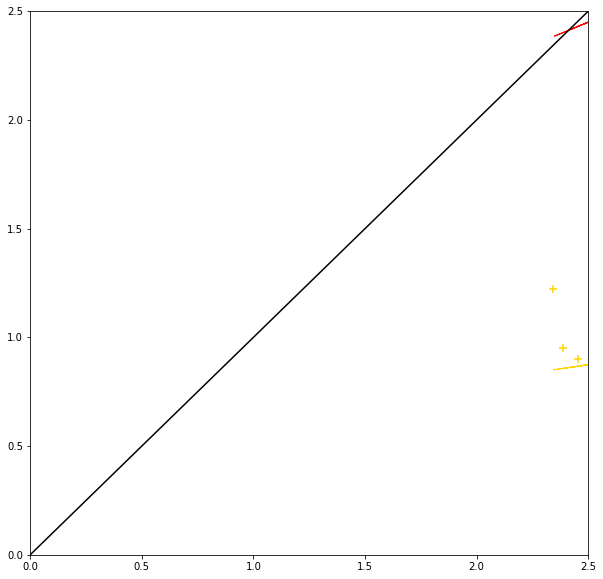

In [117]:
plt.figure(figsize=(10,10))
plt.scatter(R['R_10p1'],R['R_Z_ZDR_KDP'],c='red',marker='o')
plt.scatter(R['R_10p1'],R['R_KDP'],c='blue',marker='x')
plt.scatter(R['R_10p2'],R['R_Z_ZDR'],c='green',marker='s')
plt.scatter(R['R_10p2'],R['R_Z'],c='purple',marker='D')
plt.scatter(R['R_10p2'],R['R_Marshall'],c='gold',marker='+',s = 80)
#plt.xticks(np.arange(0, 2.30, step=0.5))
#plt.yticks(np.arange(0, 2.30, step=0.5))
def betfit(X,Y,c):    
    a, b = np.polyfit(X,Y, 1)
    plt.plot(X, a*X+b,c=c, linestyle='-',linewidth=1.0)
betfit(R['R_10p1'],R['R_Z_ZDR_KDP'], c='red')
betfit(R['R_10p1'],R['R_KDP'], c='blue')
betfit(R['R_10p2'],R['R_Z_ZDR'], c='green')
betfit(R['R_10p2'],R['R_Z'], c='purple')
betfit(R['R_10p2'],R['R_Marshall'], c='gold')
myMAX=max(max(R['R_10p1']),max(R['R_Z_ZDR_KDP']))
plt.plot([0,myMAX],[0,myMAX],color='black')
plt.xlim(xmin=0.0,xmax=2.5)
plt.ylim(ymin=0.0,ymax=2.5);

In [48]:
df_1

,Ranges,Stations,times,Event,SC_SVM,R_10p,R_Z_ZDR_KDP,R_KDP
0,19.16,Chiềng Ơn,05:10 19/02,1,1,0.2,0.319690,0.487324
1,22.09,Thuận Châu,05:10 19/02,1,1,1.4,0.641118,0.587215
2,23.07,Nậm Ét,05:10 19/02,1,1,1.6,0.437038,0.729860
3,31.40,Nậm Giôn,05:10 19/02,1,1,6.8,0.993888,1.534604
4,31.77,Mường Ảng,05:10 19/02,1,1,0.4,0.376723,0.427169
...,...,...,...,...,...,...,...,...
12170,114.29,Mường Vi,13:00 26/08,23,1,1.2,0.319923,0.351203
12171,114.62,Bát Xát,13:00 26/08,23,1,0.2,0.254884,0.367958
12172,114.99,Bản Lang,13:00 26/08,23,1,0.2,0.442459,0.456445
12173,120.21,Pa Nậm Cúm,13:00 26/08,23,1,0.4,0.470478,0.537792


In [3]:
df=pd.read_excel('part1-3.xlsx')

In [71]:
df['SHY95_S'].max()

99.43

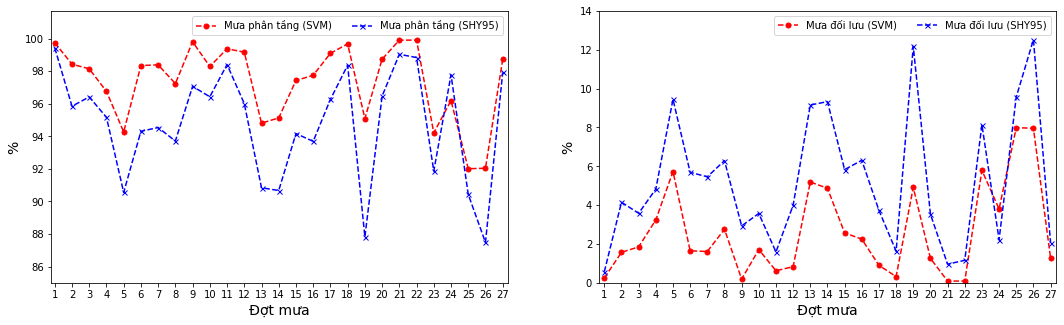

In [4]:
plt.figure(figsize=(18,5),facecolor='white')
plt.subplot(121)
#plt.rcParams['axes.facecolor']='white'
events=df['Events']
plt.plot(events,df['SVM_S'], linewidth=1.5,color='red', label="Mưa phân tầng (SVM)",marker='o',markersize = 5,linestyle="--")
plt.plot(events, df['SHY95_S'], linewidth=1.5,color='blue', label="Mưa phân tầng (SHY95)",marker='x',markersize = 5,linestyle="--")
plt.xlabel('Đợt mưa', fontsize=14)
plt.ylim([85,101.7])
plt.xlim([0.8,27.3])
plt.ylabel('%', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=2)
plt.xticks(np.arange(1, 28, step=1));
plt.subplot(122)
events=df['Events']
plt.plot(events,df['SVM_C'], linewidth=1.5,color='red', label="Mưa đối lưu (SVM)",marker='o',markersize = 5,linestyle="--")
plt.plot(events, df['SHY95_C'], linewidth=1.5,color='blue', label="Mưa đối lưu (SHY95)",marker='x',markersize = 5,linestyle="--")
plt.xlabel('Đợt mưa', fontsize=14)
plt.ylim([0,14])
plt.xlim([0.7,27.3])
plt.ylabel('%', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=2)
plt.xticks(np.arange(1, 28, step=1));

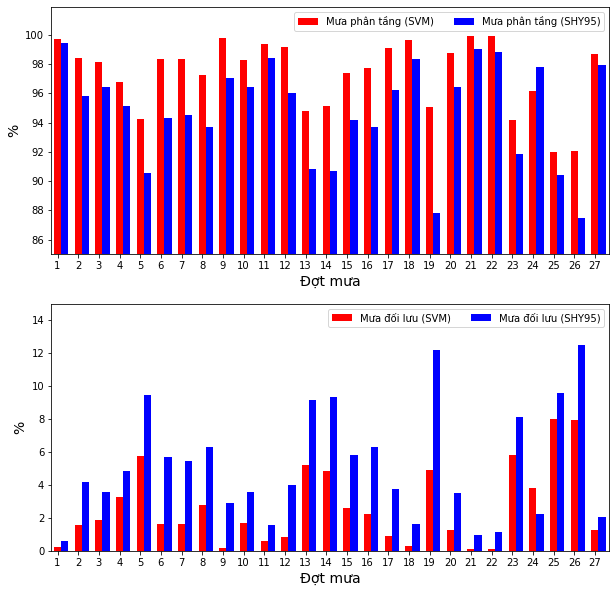

In [23]:
plt.figure(figsize=(10,10),facecolor='white')
plt.subplot(211)
#plt.rcParams['axes.facecolor']='white'
events=df['Events']
bar_width = 0.35
plt.bar(events,df['SVM_S'], width=bar_width,color='red', label="Mưa phân tầng (SVM)")
plt.bar(events+bar_width, df['SHY95_S'], width=bar_width,color='blue', label="Mưa phân tầng (SHY95)")
plt.ylim([85,101.9])
plt.xlabel('Đợt mưa', fontsize=14)
plt.xlim([0.7,27.7])
plt.ylabel('%', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=2)
plt.xticks(np.arange(1, 28, step=1));
plt.subplot(212)
events=df['Events']
plt.bar(events,df['SVM_C'], width=bar_width,color='red', label="Mưa đối lưu (SVM)")
plt.bar(events+bar_width, df['SHY95_C'], width=bar_width,color='blue', label="Mưa đối lưu (SHY95)")
plt.xlabel('Đợt mưa', fontsize=14)
plt.ylim([0,15])
plt.xlim([0.7,27.7])
plt.ylabel('%', fontsize=14)
plt.grid(False)
plt.legend(loc='upper right', ncol=2)
plt.xticks(np.arange(1, 28, step=1));

In [ ]:
#bar_plot
plt.figure(figsize=(15,5))
plt.subplot(121)
bar_width = 0.04
plt.bar(BIAS['Ranges'],BIAS["R_Z_ZDR_KDP"],color='red',width=bar_width,label="R(Z,ZDR,KDP)")#, linewidth=2,color='red', label="CC_Z_ZDR_KDP",marker='o',markersize = 8)
plt.bar(BIAS['Ranges']+bar_width,BIAS["R_KDP"],color='blue',width=bar_width,label="R(Z,KDP)")#, linewidth=2,color='blue', label="CC_KDP",marker='o',markersize = 8)
plt.xlabel('Khoảng cách từ Ra đa', fontsize = 13)
plt.ylabel('Bias (%)', fontsize = 13)
plt.ylim(0,-100)
plt.grid(False)
plt.legend(loc='upper right',ncol=3)
plt.xticks(CC['Ranges']+bar_width+bar_width,['<50km', '50-100km', '>100km']);
